In [1]:
# import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder,StandardScaler
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read in the data
covid = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/COVID-19BehaviorData_CAN_USA.csv", na_values=[" ", "__NA__"])

## Initial Exploration

In [3]:
# data types of all the variables
covid.dtypes

Index                  int64
RecordNo              object
endtime               object
qweek                 object
i1_health              int64
                       ...  
age                    int64
region_state          object
household_size        object
household_children    object
employment_status     object
Length: 79, dtype: object

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               28825 non-null  int64  
 1   RecordNo            28825 non-null  object 
 2   endtime             28825 non-null  object 
 3   qweek               28825 non-null  object 
 4   i1_health           28825 non-null  int64  
 5   i2_health           28825 non-null  int64  
 6   i7a_health          28825 non-null  int64  
 7   i3_health           28420 non-null  object 
 8   i4_health           27968 non-null  object 
 9   i5_health_1         28106 non-null  object 
 10  i5_health_2         28106 non-null  object 
 11  i5_health_3         28106 non-null  object 
 12  i5_health_4         28106 non-null  object 
 13  i5_health_5         28106 non-null  object 
 14  i5_health_99        28106 non-null  object 
 15  i5a_health          2606 non-null   object 
 16  i6_h

In [5]:
# Check wether the dataset have Duplicate values
covid.duplicated().sum()

0

In [6]:
# count the number of missing values in each column
covid.isnull().sum()

Index                 0
RecordNo              0
endtime               0
qweek                 0
i1_health             0
                     ..
age                   0
region_state          0
household_size        0
household_children    0
employment_status     0
Length: 79, dtype: int64

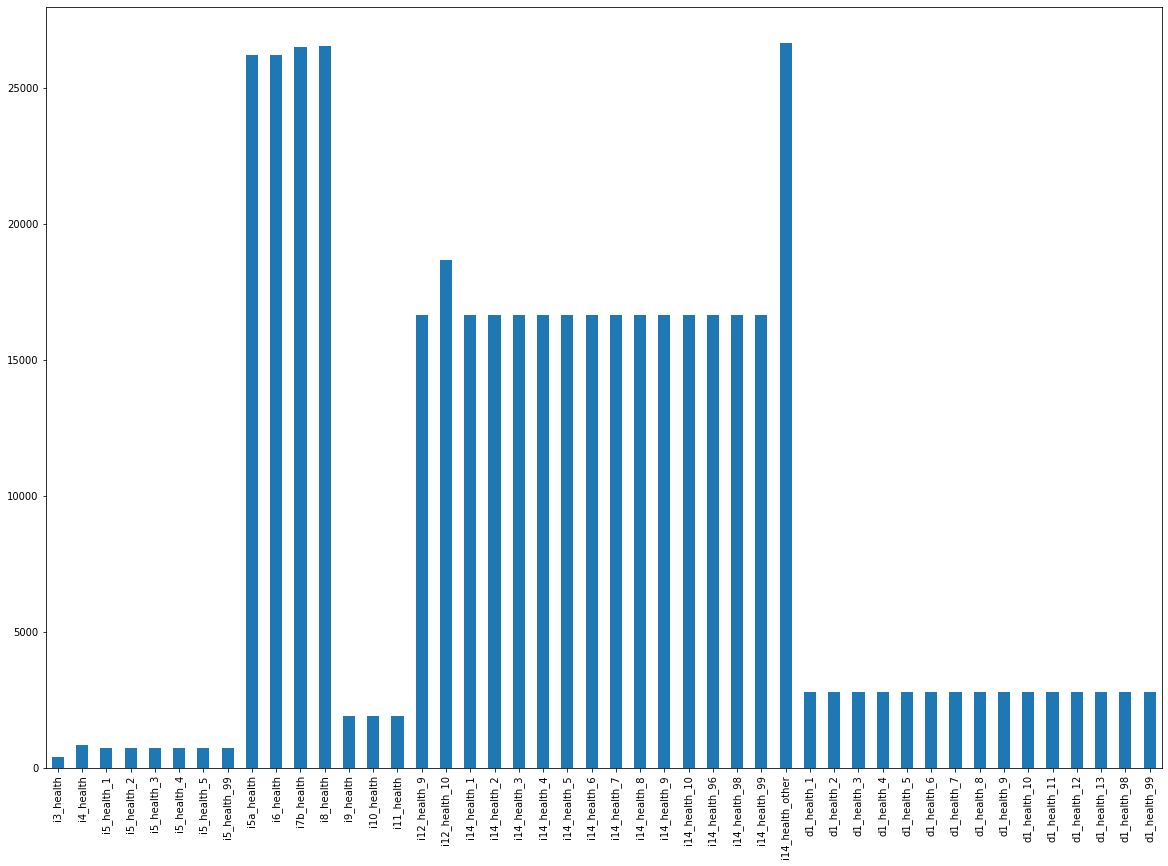

In [7]:
# plot the number of missing values for each variable
covid.isnull().sum()[covid.isna().sum()>0].plot(kind='bar', figsize=(20,14))

## Handling Missing Values
1. For variables that have LOTS of missing values, such as `i5a_health` and `i14_health_other` (92.4% missing), we dropped them.
2. For the rest of the variables that have missing values, they are less than 10% of our total number of observations -> we dropped the observations that contain missing values from these variables.
- Most of these observations are also systematically missing. For example, for `d1`-related variables, people who did not answer one question did not answer all of the `d1`-related questions

In [8]:
# drop the columns that had above --% missing values 
covid.drop(columns=['i5a_health','i6_health','i7b_health','i8_health','i12_health_9',\
                    'i12_health_10','i14_health_1','i14_health_2','i14_health_3','i14_health_4',\
                    'i14_health_5','i14_health_6','i14_health_7','i14_health_8','i14_health_9','i14_health_10','i14_health_96',\
                    'i14_health_98','i14_health_99','i14_health_other'],inplace=True)

In [9]:
# drop the rows that had any missing values in these columns
covid.dropna(subset=['i3_health','i4_health','i5_health_1','i5_health_2','i5_health_3','i5_health_4','i5_health_5','i5_health_99',\
                     'i9_health','i10_health','i11_health','d1_health_1','d1_health_2','d1_health_3','d1_health_4','d1_health_5','d1_health_6','d1_health_7','d1_health_8','d1_health_9',\
'd1_health_10','d1_health_11','d1_health_12','d1_health_13','d1_health_99','d1_health_98'],how='any',inplace=True)

In [10]:
# to see how many observations we are left with
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23532 entries, 0 to 27858
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               23532 non-null  int64  
 1   RecordNo            23532 non-null  object 
 2   endtime             23532 non-null  object 
 3   qweek               23532 non-null  object 
 4   i1_health           23532 non-null  int64  
 5   i2_health           23532 non-null  int64  
 6   i7a_health          23532 non-null  int64  
 7   i3_health           23532 non-null  object 
 8   i4_health           23532 non-null  object 
 9   i5_health_1         23532 non-null  object 
 10  i5_health_2         23532 non-null  object 
 11  i5_health_3         23532 non-null  object 
 12  i5_health_4         23532 non-null  object 
 13  i5_health_5         23532 non-null  object 
 14  i5_health_99        23532 non-null  object 
 15  i9_health           23532 non-null  object 
 16  i10_

- After dealing with the missing values, our number of observations dropped from 28825 to 23532.

In [11]:
# check to make sure we dealt with all the missing values
covid[covid.isnull().any(axis=1)]

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,...,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status


## Further manipulation



### Drop additional variables

Going through all of the variables we have after handling the missing values, we want to further get rid of the variables that do not seem to be useful for our modeling.

Also, `i7a_health` is not described in the dictionary, so we dropped this variable too.

In [12]:
covid.drop(columns=['Index', 'RecordNo', 'endtime', 'qweek'], inplace=True)

### Drop additional observations

In [13]:
covid = covid[covid['i3_health'] != 'Yes, and I have not received my results from the test yet']
covid = covid[covid['i3_health'] != 'No, I have not']

In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 103 to 27854
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i1_health           1453 non-null   int64  
 1   i2_health           1453 non-null   int64  
 2   i7a_health          1453 non-null   int64  
 3   i3_health           1453 non-null   object 
 4   i4_health           1453 non-null   object 
 5   i5_health_1         1453 non-null   object 
 6   i5_health_2         1453 non-null   object 
 7   i5_health_3         1453 non-null   object 
 8   i5_health_4         1453 non-null   object 
 9   i5_health_5         1453 non-null   object 
 10  i5_health_99        1453 non-null   object 
 11  i9_health           1453 non-null   object 
 12  i10_health          1453 non-null   object 
 13  i11_health          1453 non-null   object 
 14  i12_health_1        1453 non-null   object 
 15  i12_health_2        1453 non-null   object 
 16  i12

In [15]:
# drop the observation in the regions that were considered as outlier in feature selection part
covid = covid.drop(covid.index[covid['region_state'].isin(['North Dakota', 'Vermont', 'New Hampshire','Wyoming','Delaware','Oklahoma','Nebraska','Rhode Island'])])

## Business Problem + Target Variable

We picked `i3_health` to be our target variable:

  In the last 7 days, have you personally been tested for coronavirus (COVID-19?)

- The rest of the variables do not make sense to be a variable of interest

- Drawback: we got a highly imbalanced data set. As shown below, only 0.9% of the observations are tested positive



In [16]:
# count the proportion of each level of i4_health
covid["i3_health"].value_counts(normalize=True)

Yes, and I tested negative    0.849267
Yes, and I tested positive    0.150733
Name: i3_health, dtype: float64

In [17]:
# count the proportion of each level of i4_health
covid["i4_health"].value_counts(normalize=True)

Yes, and they tested negative                                      0.531054
No, they have not                                                  0.258200
Yes, and they tested positive                                      0.110956
Yes, and they have not received their results from the test yet    0.061410
Not sure                                                           0.038381
Name: i4_health, dtype: float64

Business Problem:
- Identify vulnerable populations -> prioritize vaccine distribution / disseminate covid-prevention tips targeting at these groups of people

## EDA

### One-Variable Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Covid Testing Results')

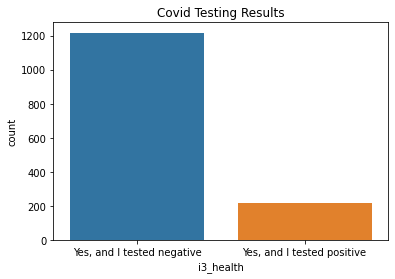

In [18]:
# target variable i3_health
# barplot
ax = sns.countplot(covid["i3_health"])
ax.set_title("Covid Testing Results")

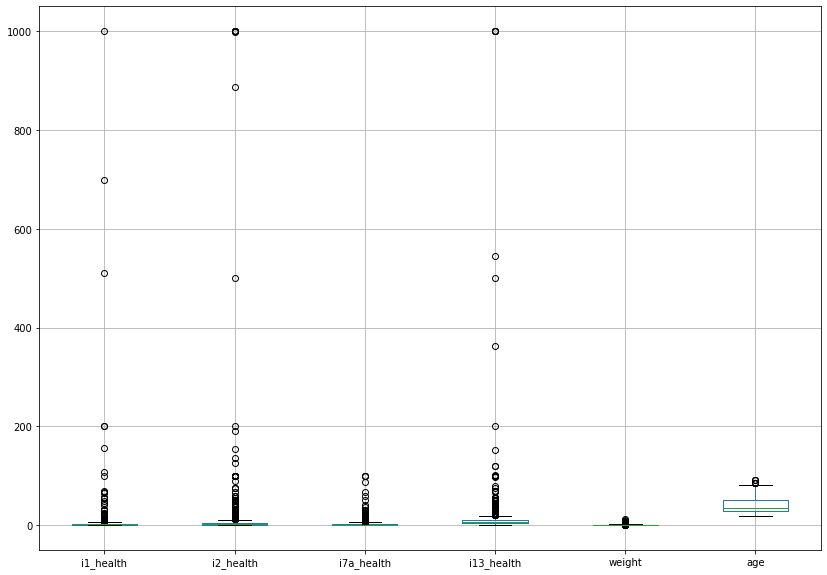

In [19]:
# boxplots
covid.boxplot(figsize = (14, 10))

- There are lots of outliers in these variables. We should consider dropping these observations as they seem to be typos. For example, it is extremely unlikely that a person washed their hands 1000 times yesterday.

In [20]:
# drop the outliers
covid = covid[covid['i1_health'] <= 40]
covid = covid[covid['i2_health'] <= 50]
covid = covid[covid['i13_health'] <= 20]
covid = covid[covid['i7a_health'] <= 20]

In [21]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 103 to 27847
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i1_health           1292 non-null   int64  
 1   i2_health           1292 non-null   int64  
 2   i7a_health          1292 non-null   int64  
 3   i3_health           1292 non-null   object 
 4   i4_health           1292 non-null   object 
 5   i5_health_1         1292 non-null   object 
 6   i5_health_2         1292 non-null   object 
 7   i5_health_3         1292 non-null   object 
 8   i5_health_4         1292 non-null   object 
 9   i5_health_5         1292 non-null   object 
 10  i5_health_99        1292 non-null   object 
 11  i9_health           1292 non-null   object 
 12  i10_health          1292 non-null   object 
 13  i11_health          1292 non-null   object 
 14  i12_health_1        1292 non-null   object 
 15  i12_health_2        1292 non-null   object 
 16  i12

- We now have 1310 observations in total

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5043d07f50>,
      dtype=object)

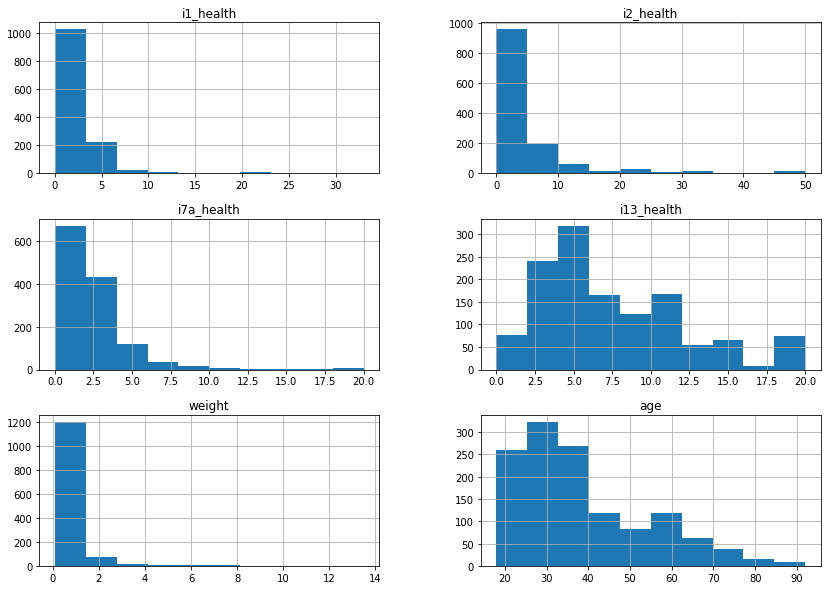

In [22]:
# numeric variables after removing the outliers
# histograms
covid.hist(figsize = (14, 10))

### Two-Variable Analysis


**Correlation between numeric predictors**

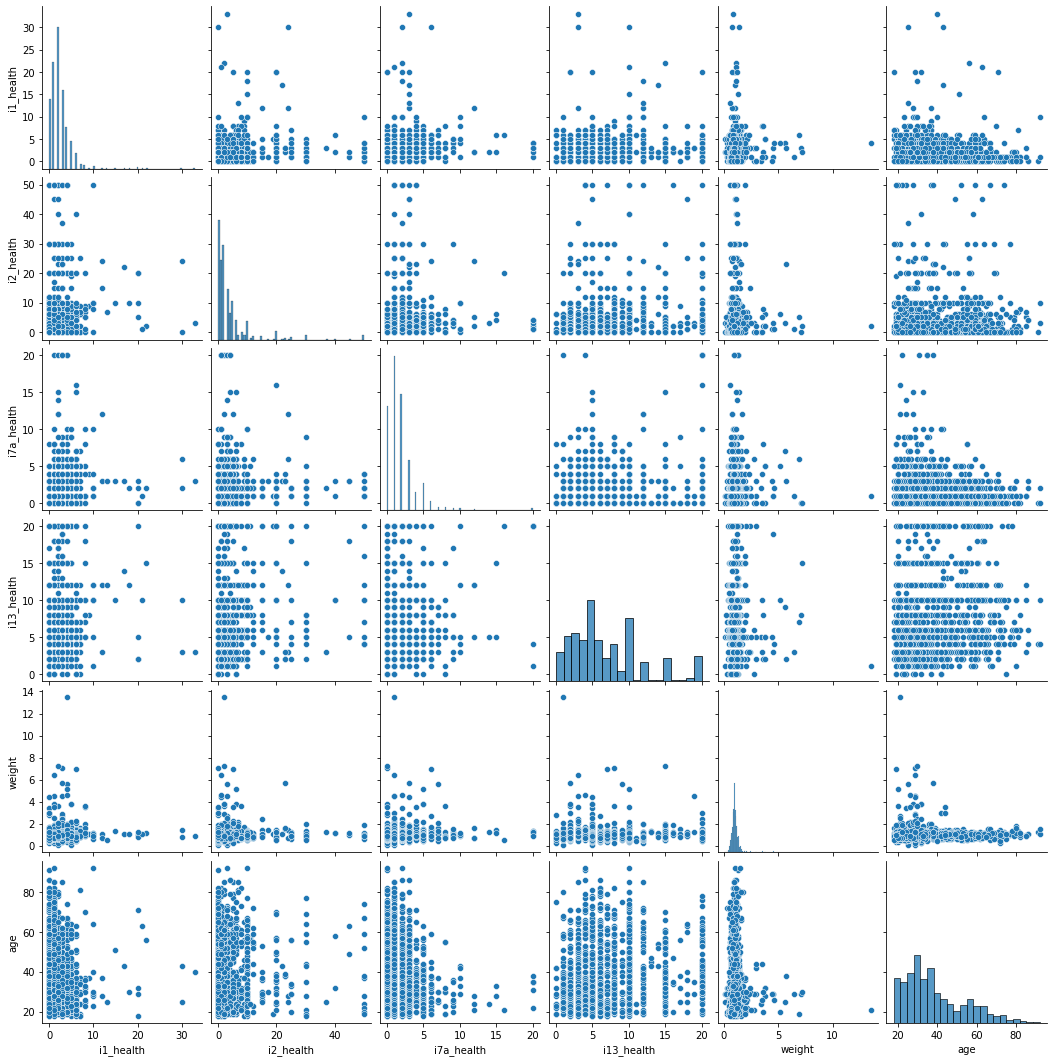

In [23]:
# Numeric variables
# Scatterplot to see their correlation
sns.pairplot(covid)

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

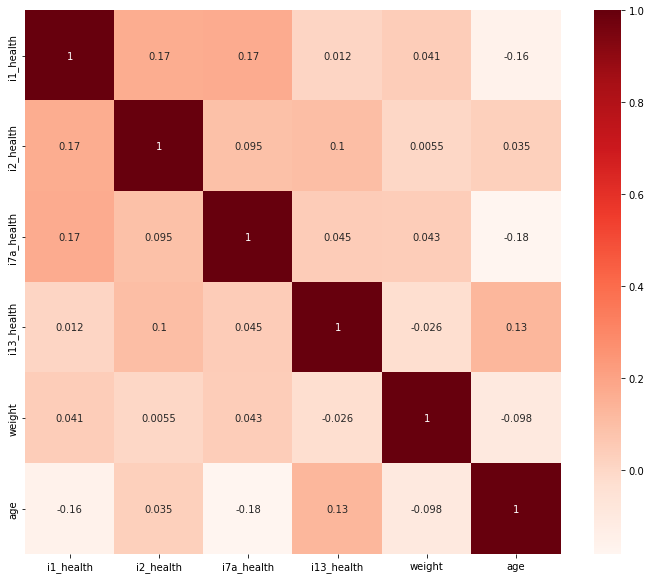

In [25]:
# Heatmap
plt.figure(figsize=(12,10))
cor=covid.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

- The numeric variables are not highly correlated with each other, meaning we do not have the issue of multicollinearity -> we can put all these numeric variables into our model

**Relationship between the target and the numeric variables**

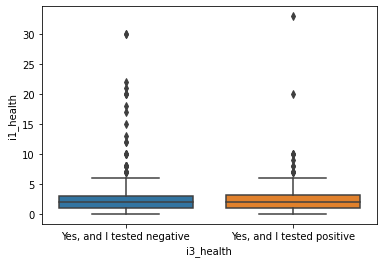

In [26]:
# i1_health
sns.boxplot(x = covid["i3_health"], y = covid["i1_health"], data = covid)

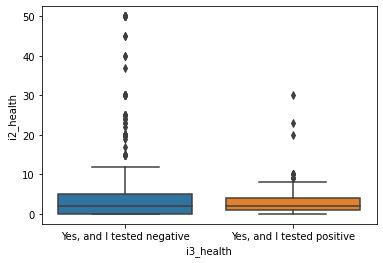

In [27]:
# i2_health
sns.boxplot(x = covid["i3_health"], y = covid["i2_health"], data = covid)

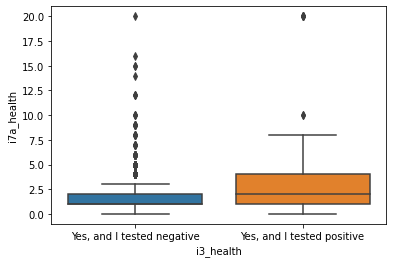

In [28]:
# i7a_health
sns.boxplot(x = covid["i3_health"], y = covid["i7a_health"], data = covid)

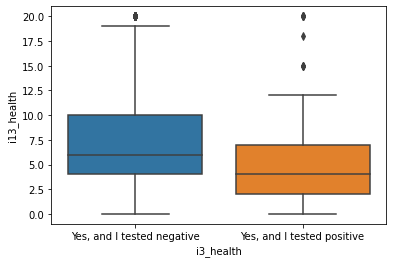

In [29]:
# i13_health
sns.boxplot(x = covid["i3_health"], y = covid["i13_health"], data = covid)

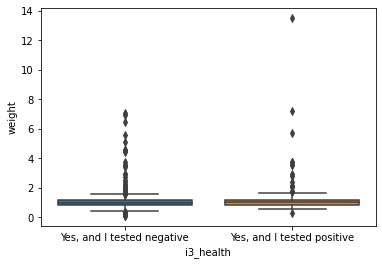

In [30]:
# weight
sns.boxplot(x = covid["i3_health"], y = covid["weight"], data = covid)

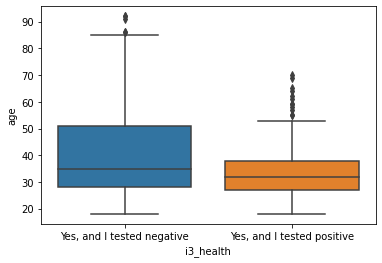

In [31]:
# age
sns.boxplot(x = covid["i3_health"], y = covid["age"], data = covid)

- From the boxplots, it seems that `i13_health` and `age` may have an impact on the target variable `i3_health`

**Relationship between the target and the categorical variables**

In [32]:
# display all the columns we have
for col in covid.select_dtypes(include='object').columns:
    print(col)

i3_health
i4_health
i5_health_1
i5_health_2
i5_health_3
i5_health_4
i5_health_5
i5_health_99
i9_health
i10_health
i11_health
i12_health_1
i12_health_2
i12_health_3
i12_health_4
i12_health_5
i12_health_6
i12_health_7
i12_health_8
i12_health_11
i12_health_12
i12_health_13
i12_health_14
i12_health_15
i12_health_16
i12_health_17
i12_health_18
i12_health_19
i12_health_20
d1_health_1
d1_health_2
d1_health_3
d1_health_4
d1_health_5
d1_health_6
d1_health_7
d1_health_8
d1_health_9
d1_health_10
d1_health_11
d1_health_12
d1_health_13
d1_health_98
d1_health_99
gender
region_state
household_size
household_children
employment_status


In [33]:
# i4_health
# sample cross-tab
i4health_crosstab = pd.crosstab(covid["i3_health"], covid["i4_health"], margins = False)
i4health_crosstab = i4health_crosstab.transpose()
i4health_crosstab_norm = i4health_crosstab.div(i4health_crosstab.sum(axis = 1), axis = 0)
i4health_crosstab_norm

i3_health,"Yes, and I tested negative","Yes, and I tested positive"
i4_health,,
"No, they have not",0.941176,0.058824
Not sure,0.900000,0.100000
"Yes, and they have not received their results from the test yet",0.831169,0.168831
"Yes, and they tested negative",0.931429,0.068571
"Yes, and they tested positive",0.218310,0.781690


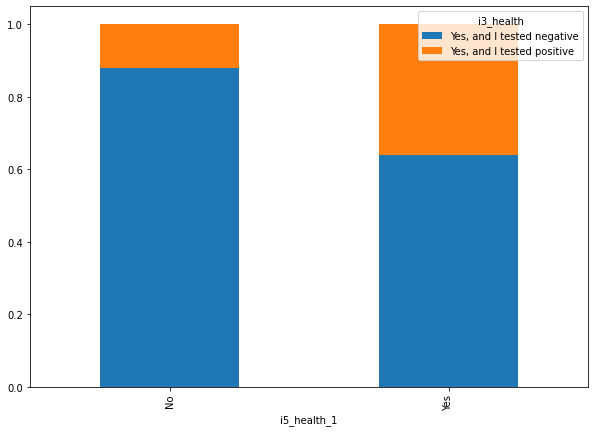

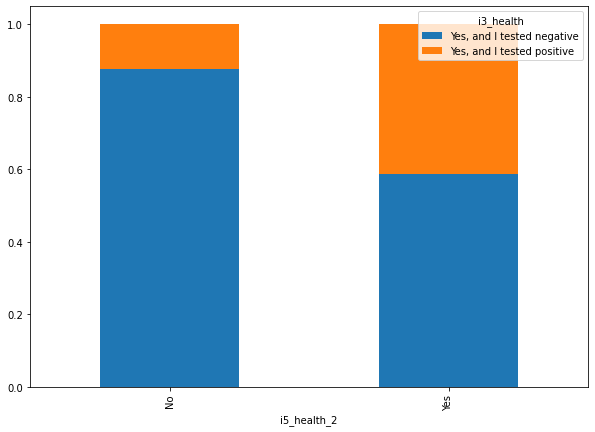

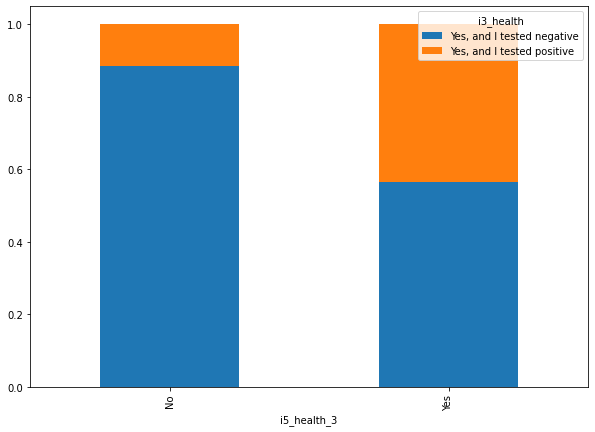

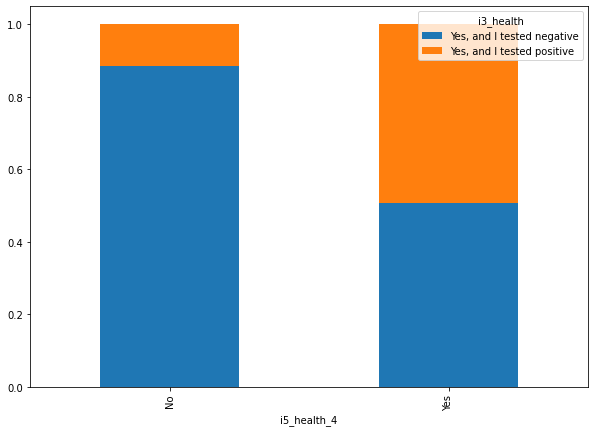

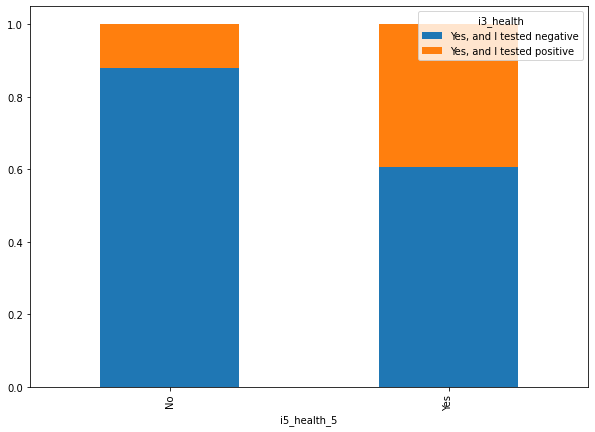

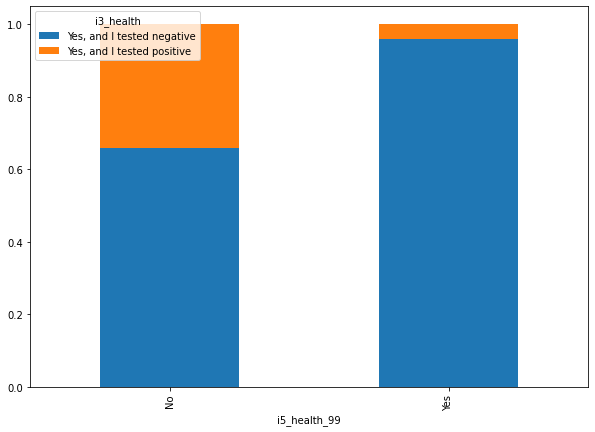

In [34]:
# generate stacked bar charts for the target vs i5 variables
for var in ["i5_health_1", "i5_health_2", "i5_health_3", "i5_health_4", "i5_health_5", "i5_health_99"]:
    crosstab = pd.crosstab(covid["i3_health"], covid[var], margins = False)
    crosstab = crosstab.transpose()
    crosstab_norm = crosstab.div(crosstab.sum(axis = 1), axis = 0)
    crosstab_norm.plot(kind = 'bar', stacked = True,figsize=(10,7))

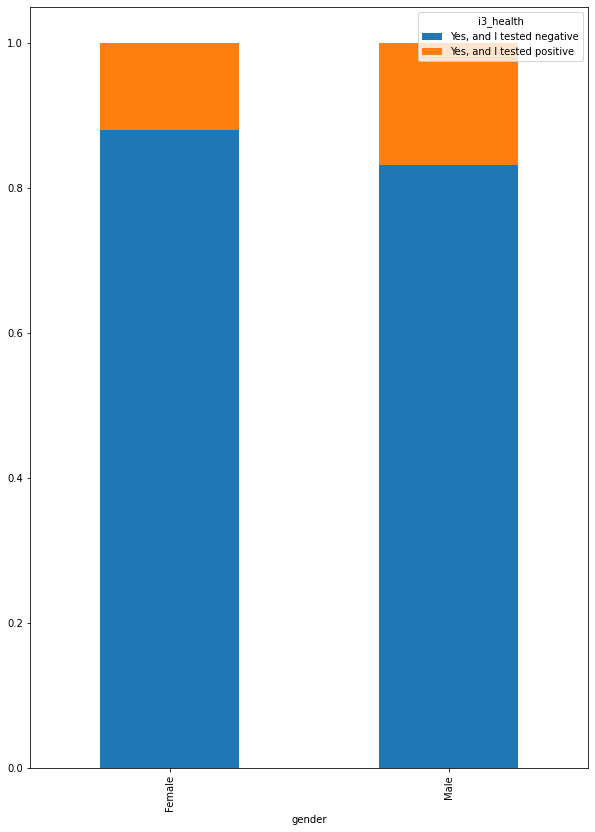

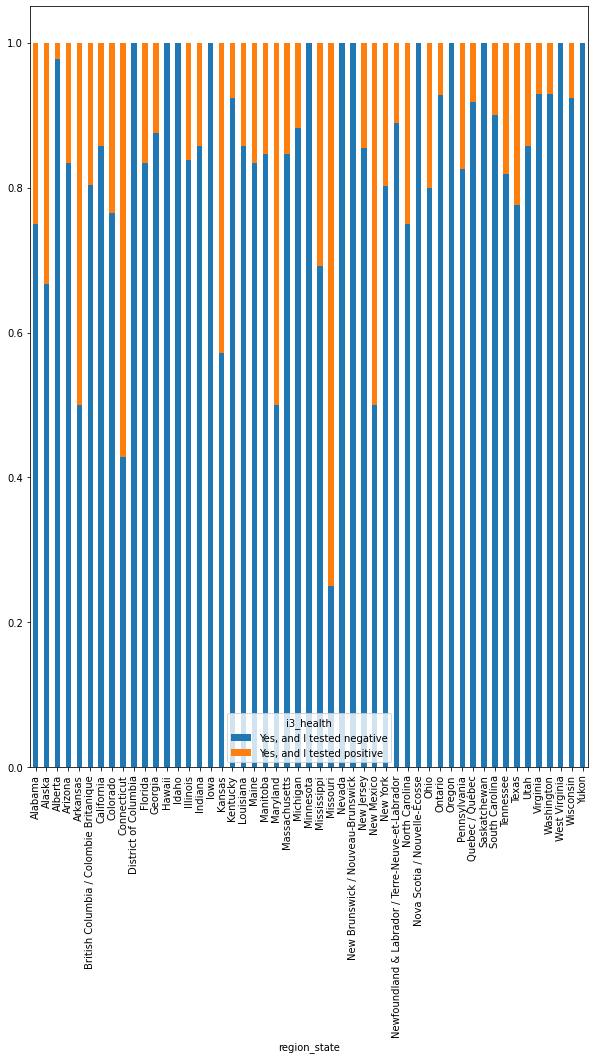

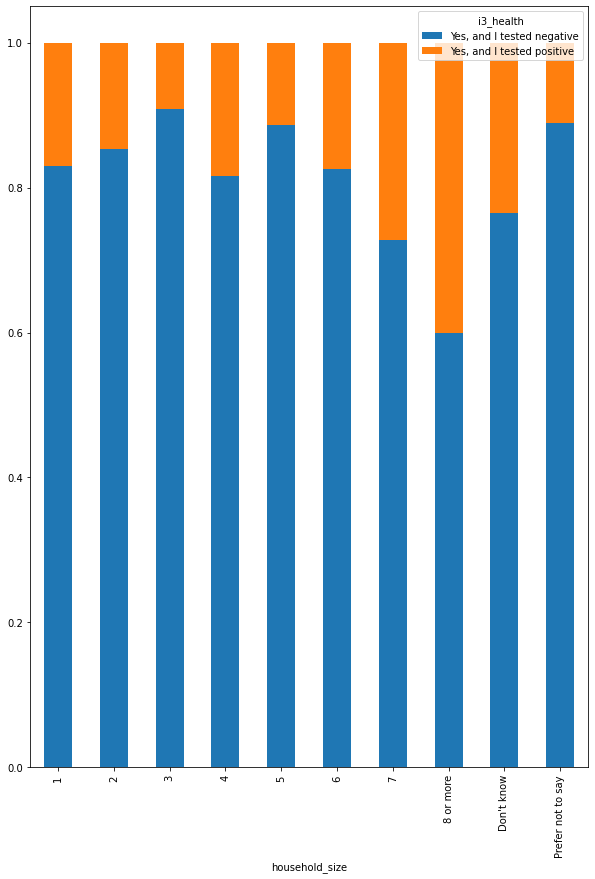

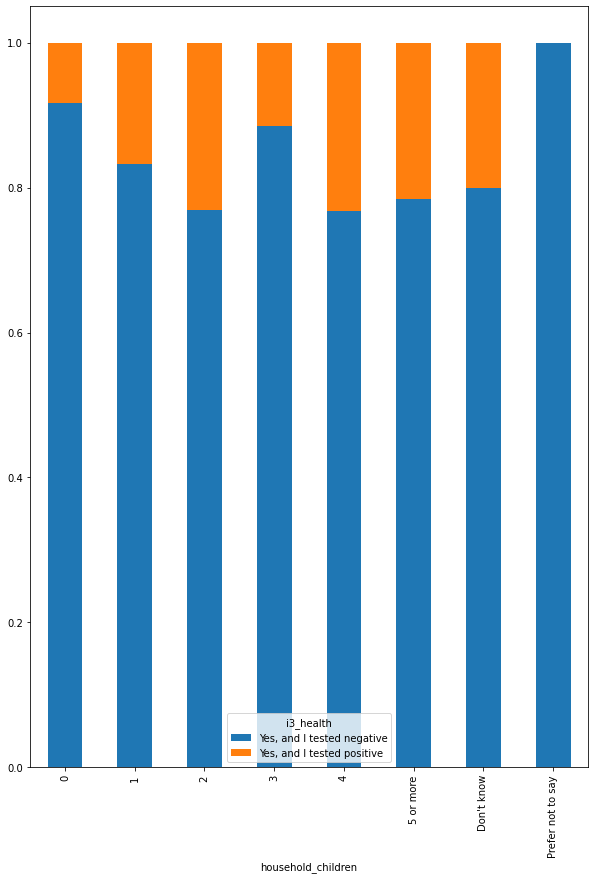

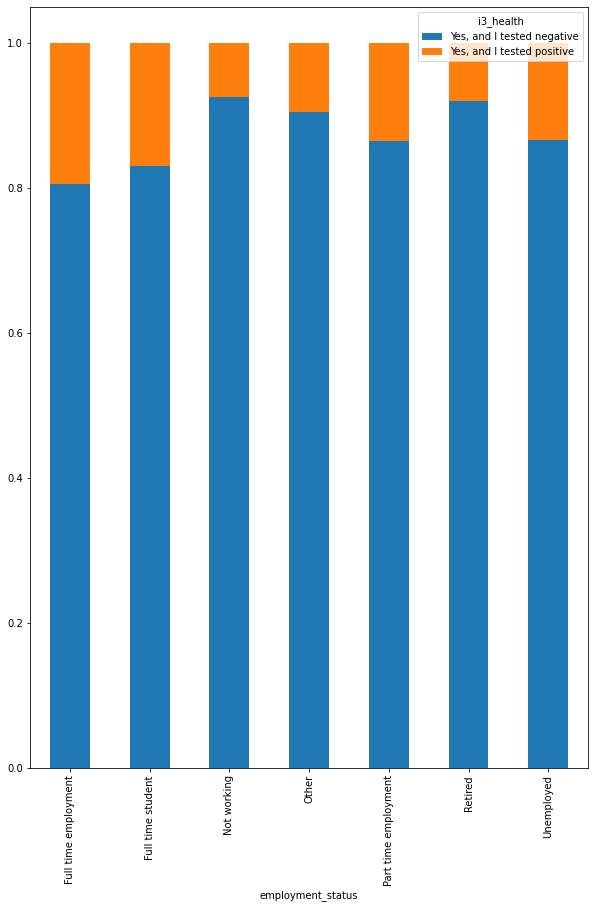

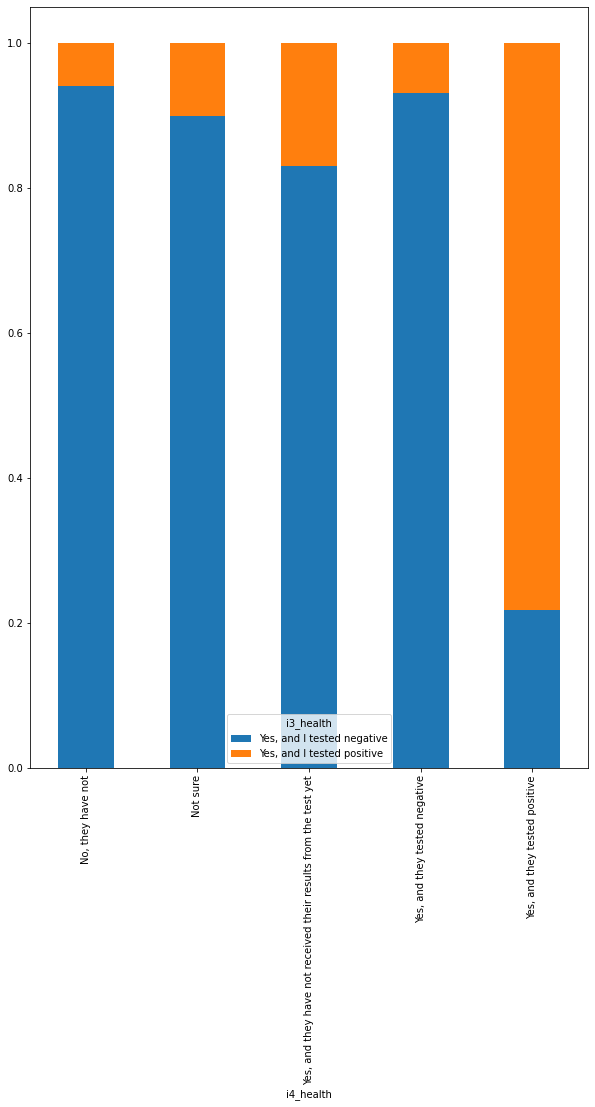

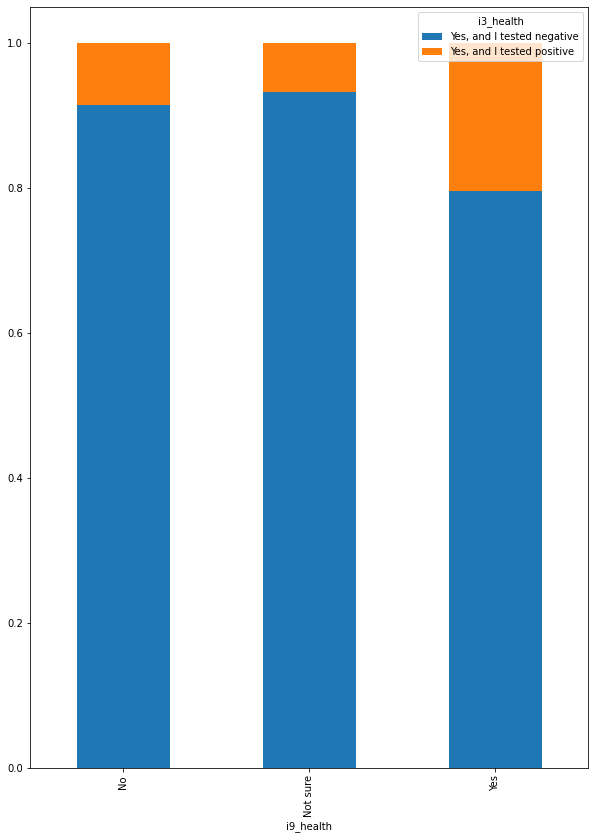

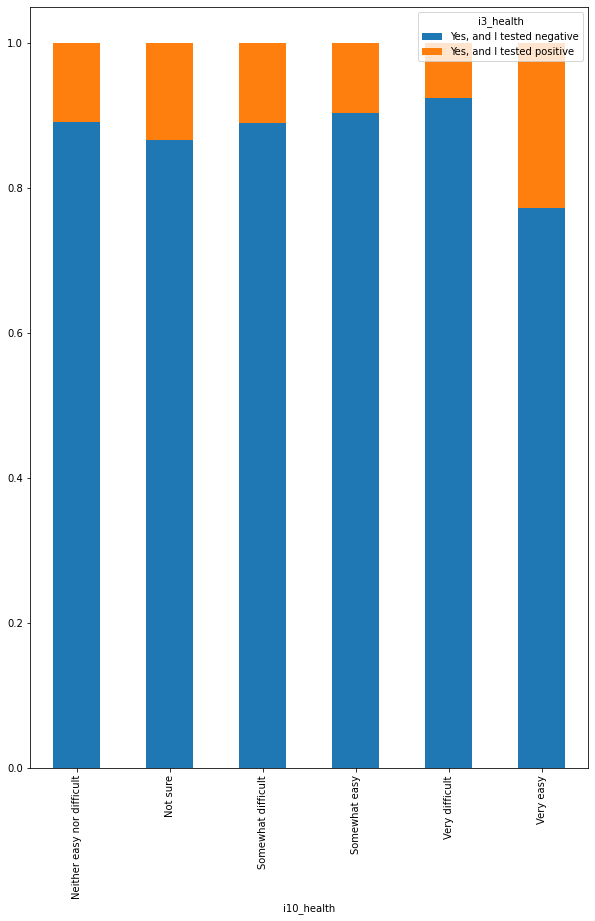

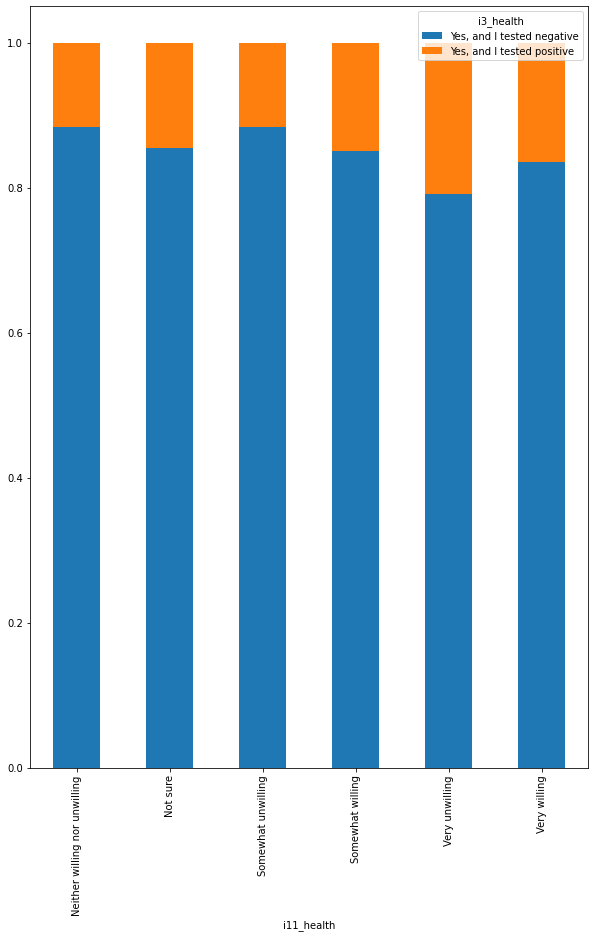

In [35]:
# stacked bar chart for demographic related variables
for var in ["gender", "region_state", "household_size", "household_children", "employment_status", "i4_health", "\
i9_health", "i10_health", "i11_health"]:
    crosstab = pd.crosstab(covid["i3_health"], covid[var], margins = False)
    crosstab = crosstab.transpose()
    crosstab_norm = crosstab.div(crosstab.sum(axis = 1), axis = 0)
    crosstab_norm.plot(kind = 'bar', stacked = True,figsize=(10,14))

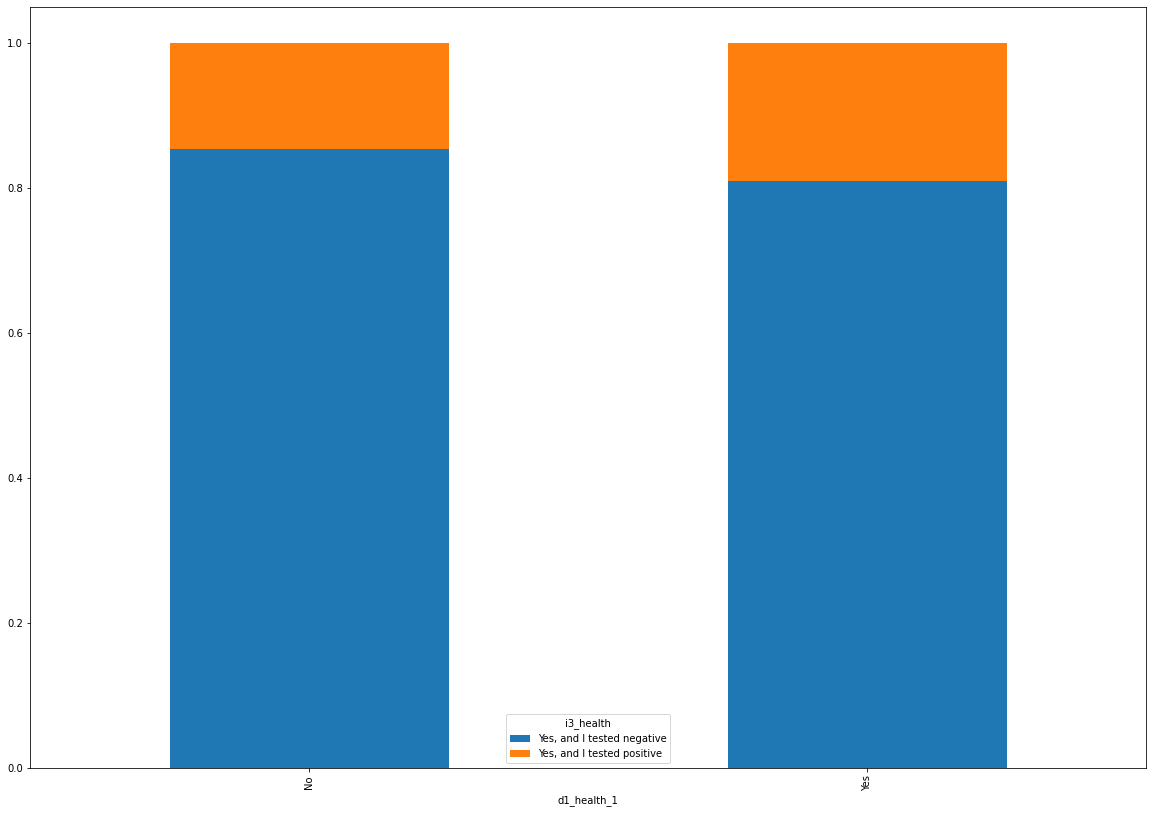

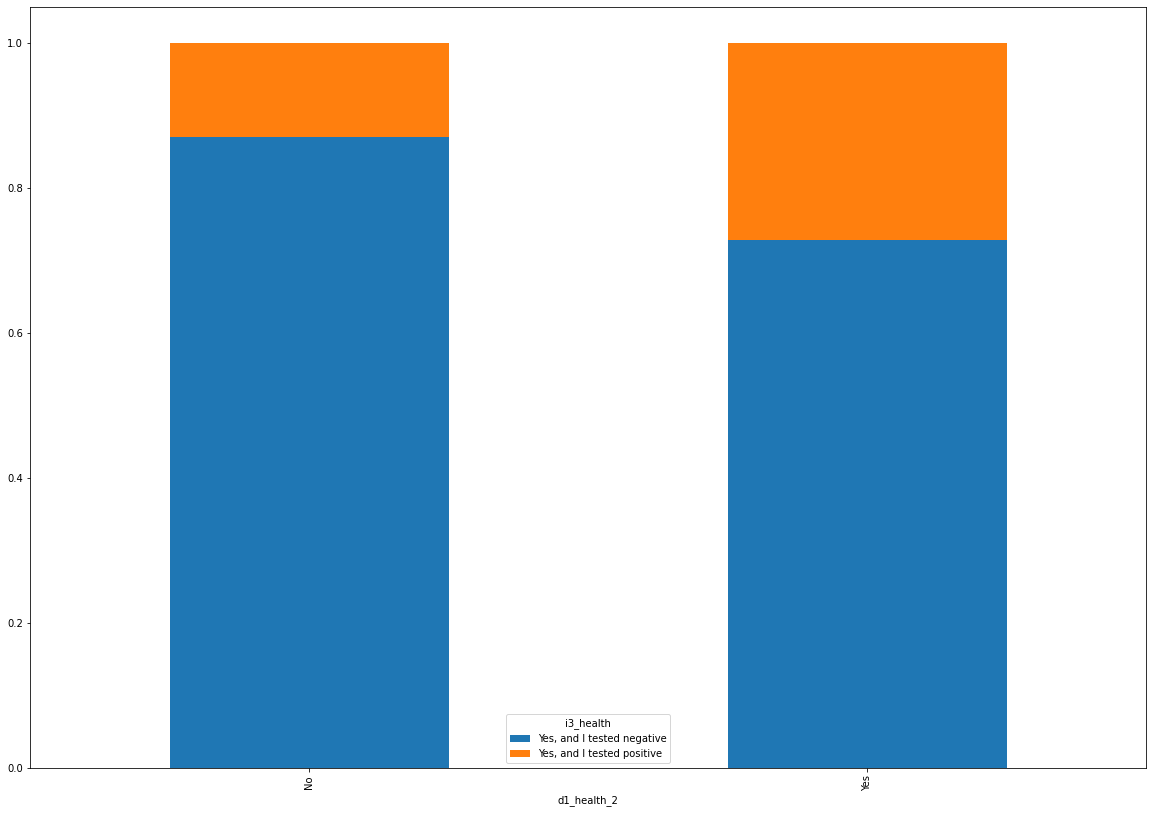

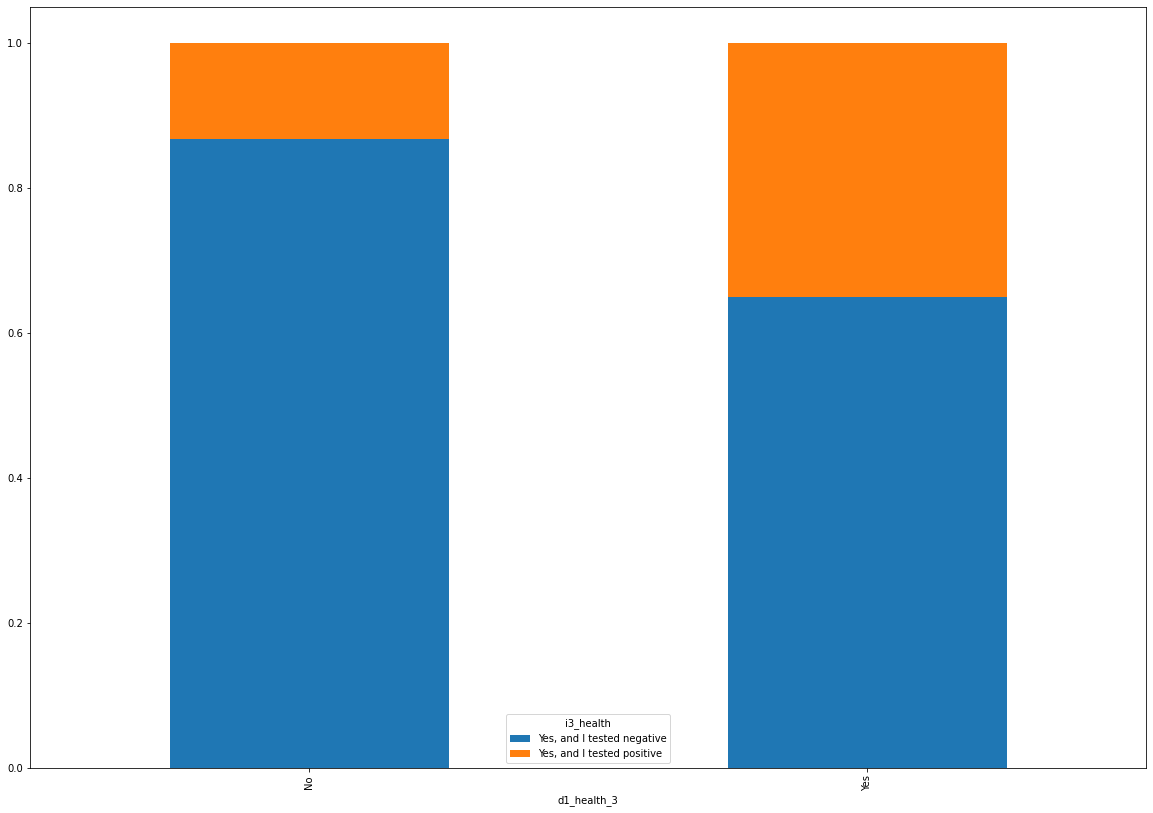

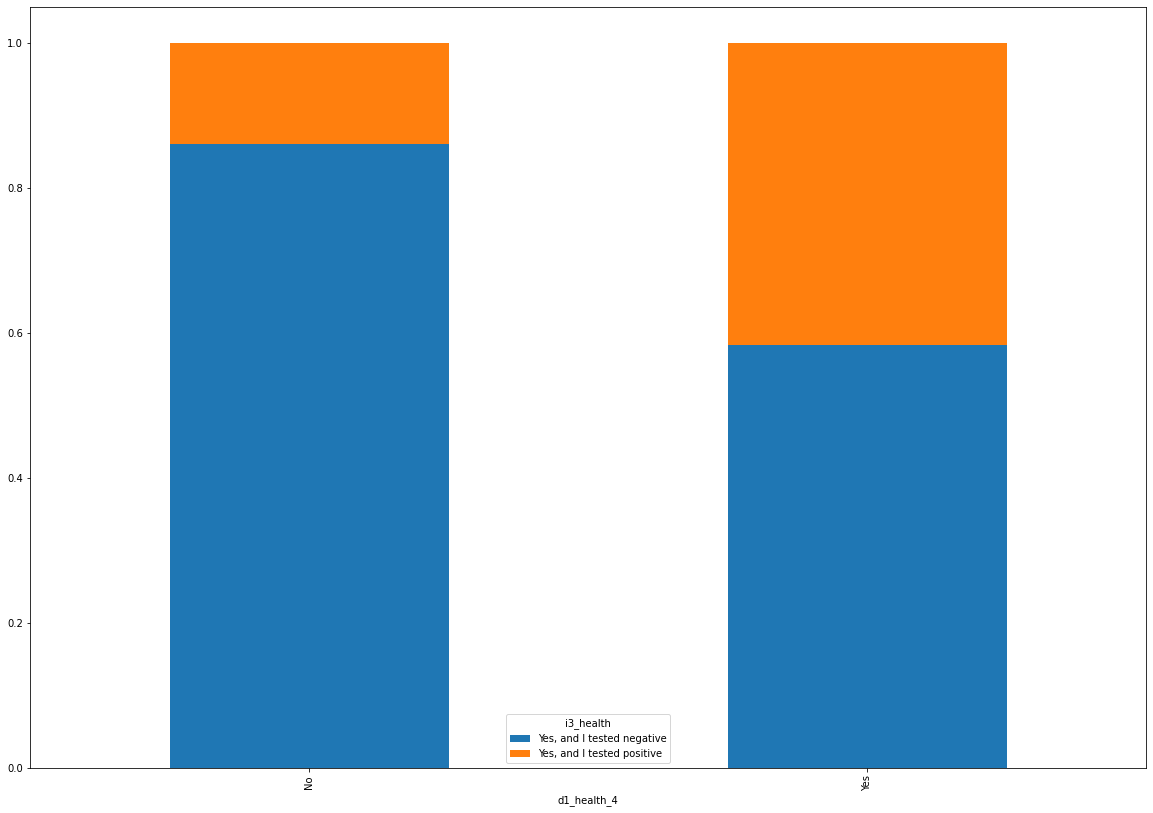

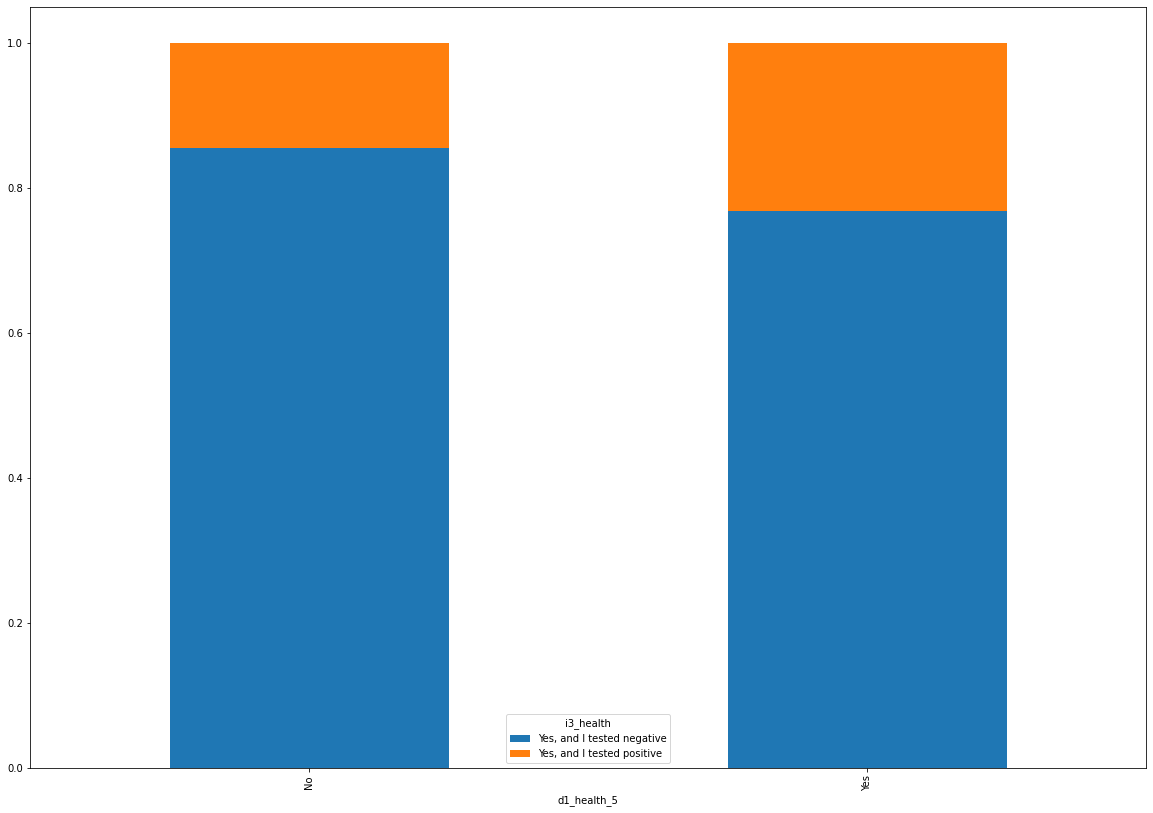

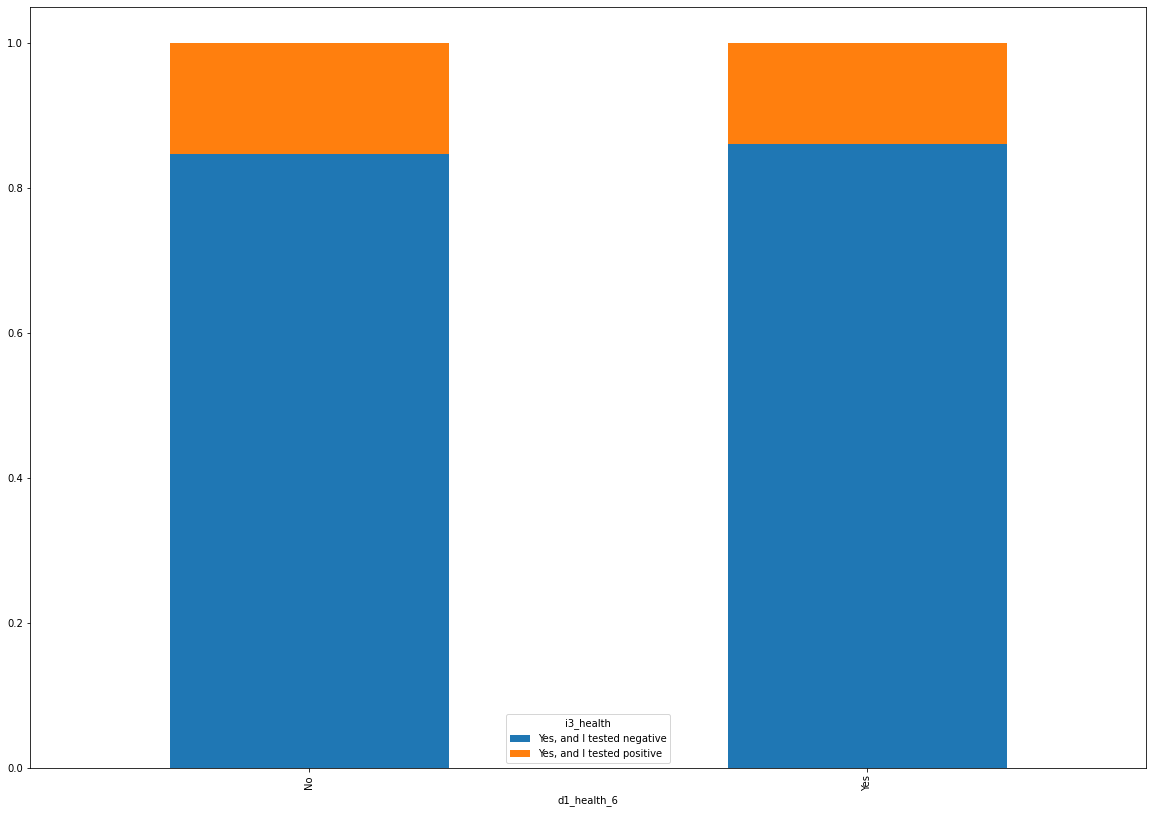

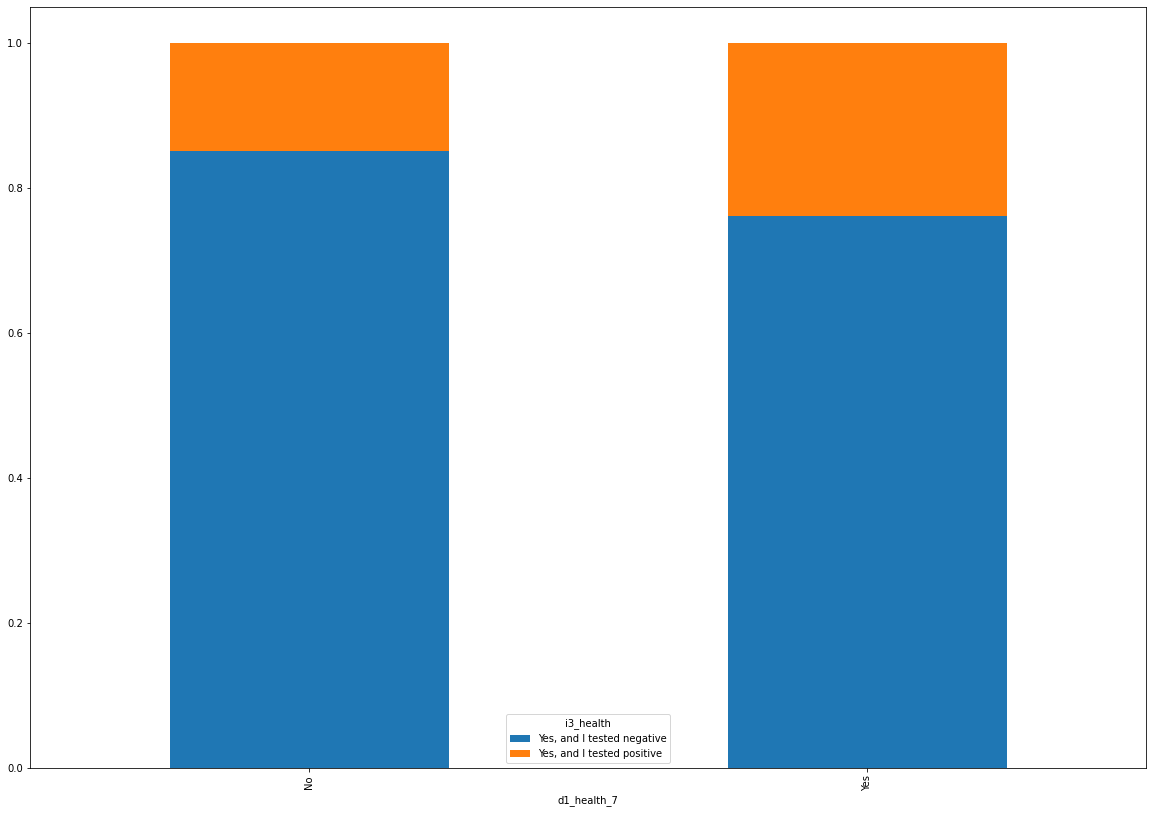

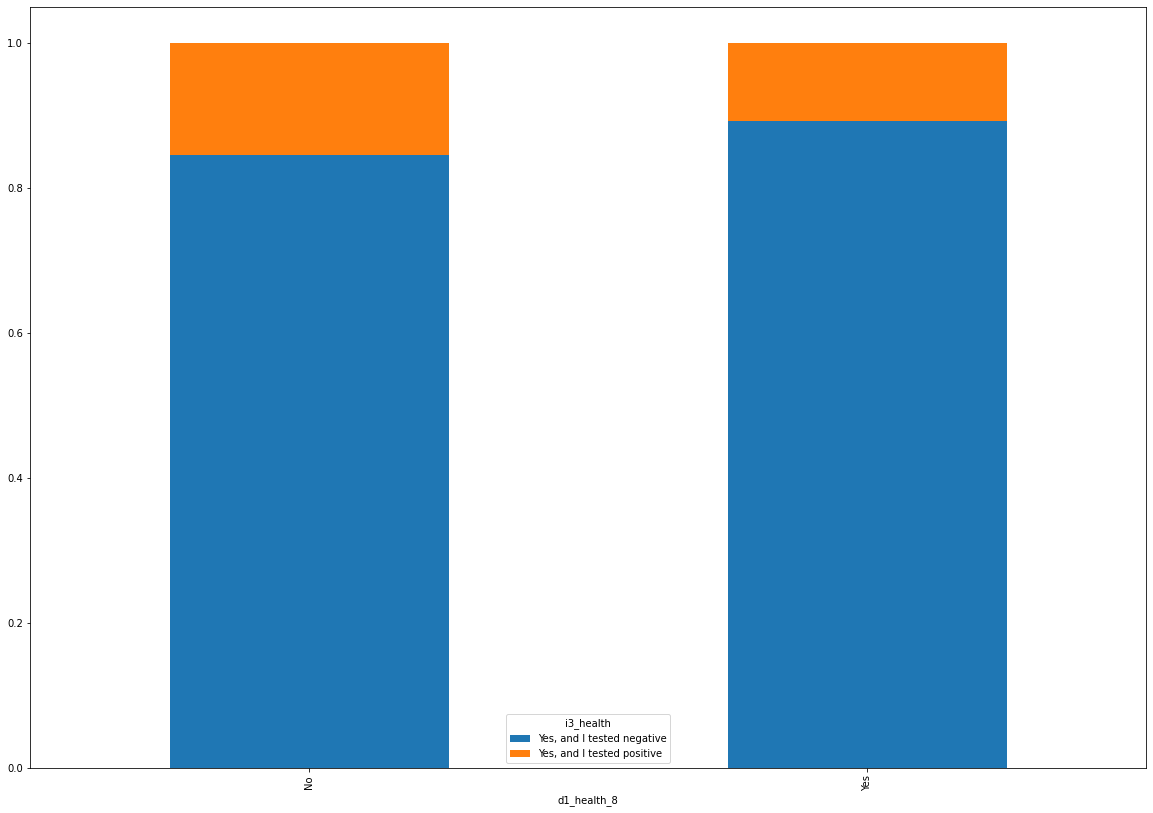

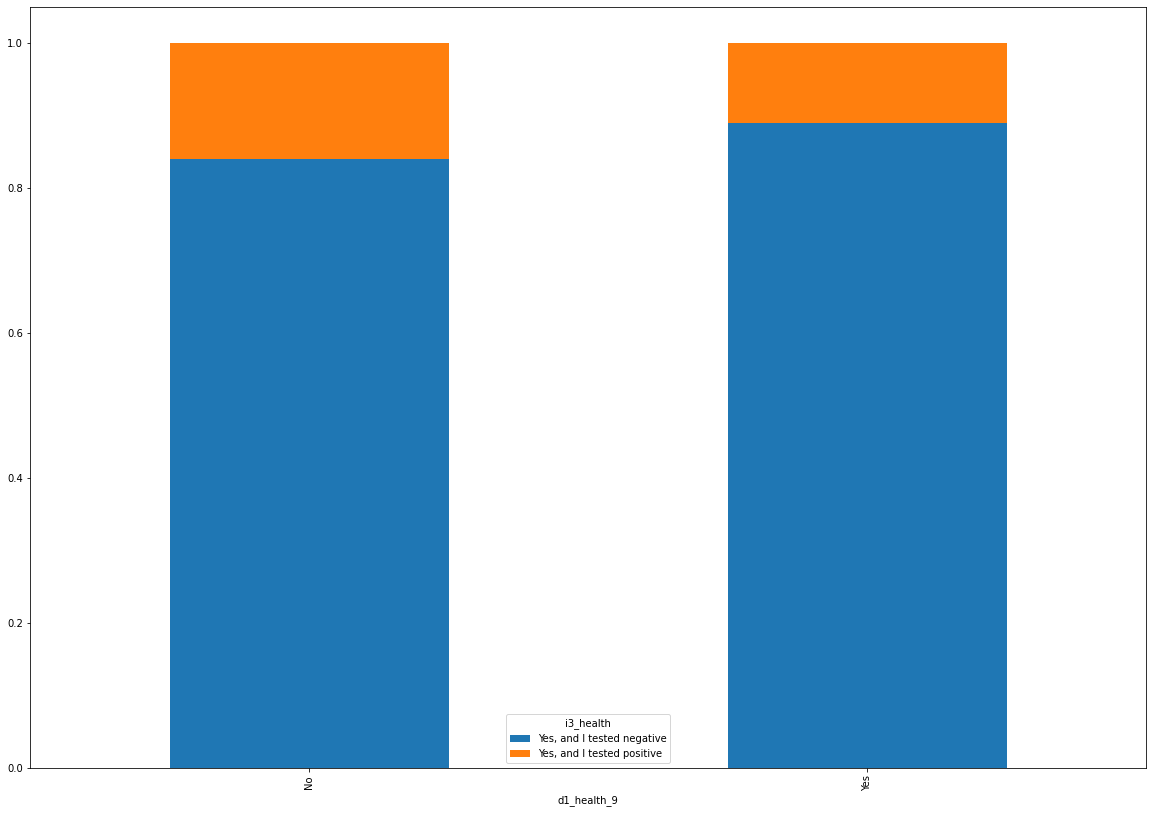

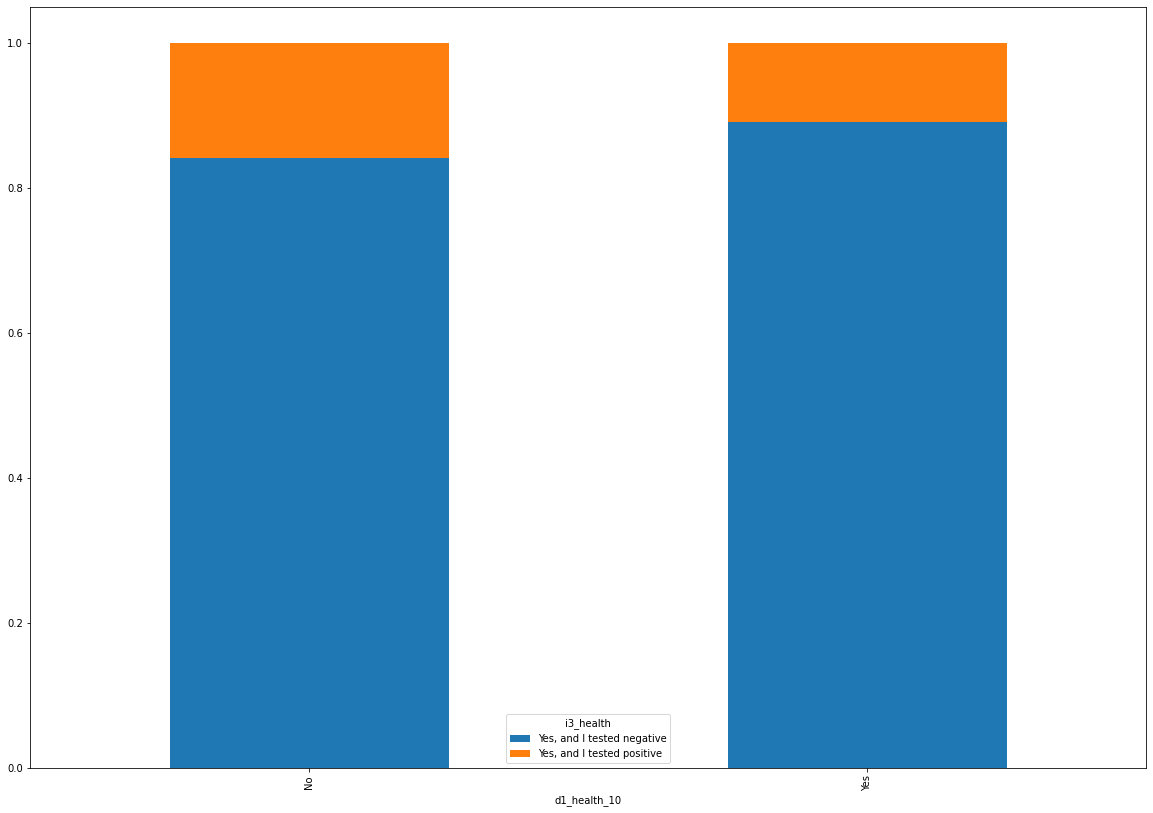

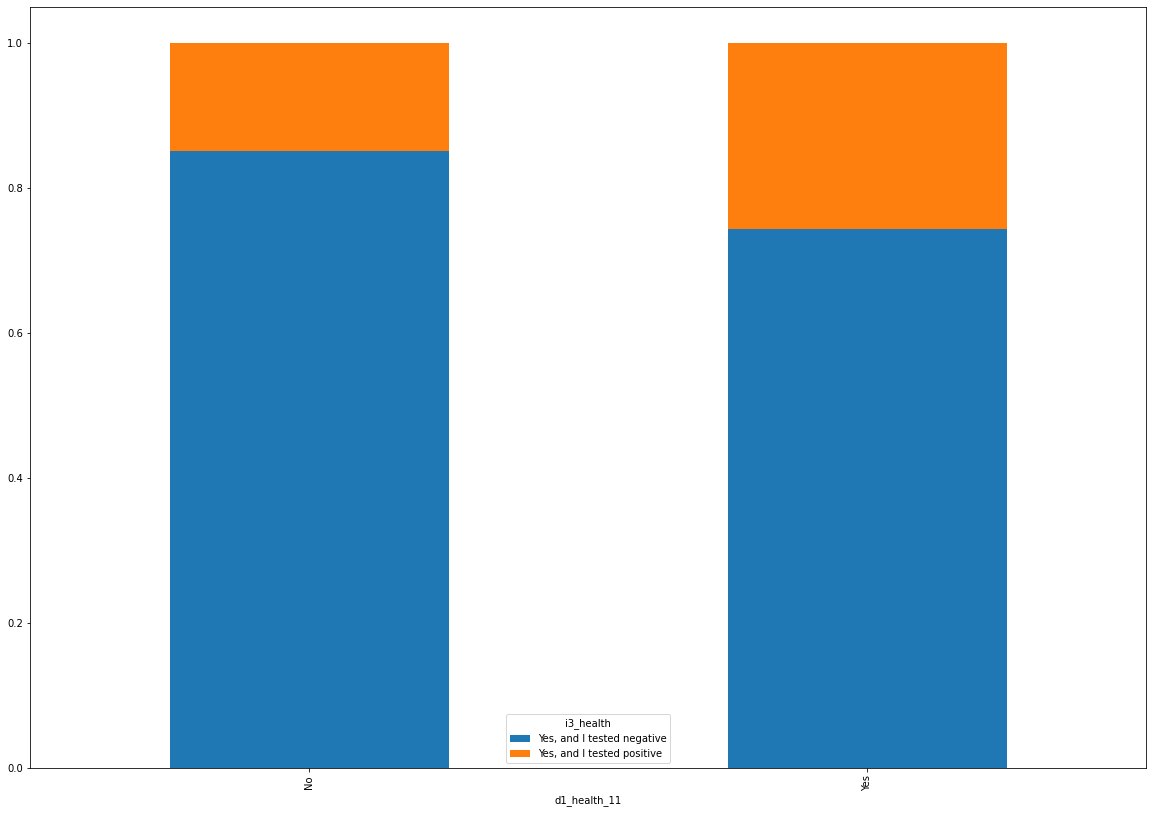

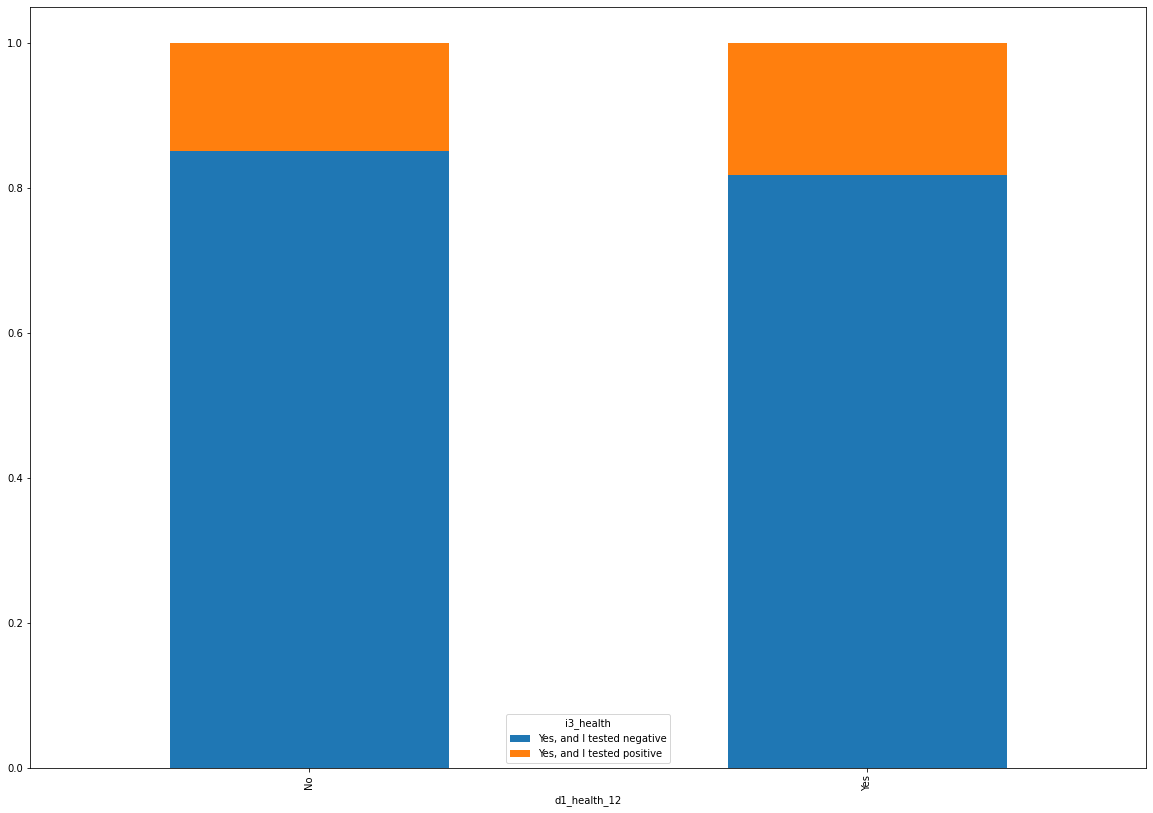

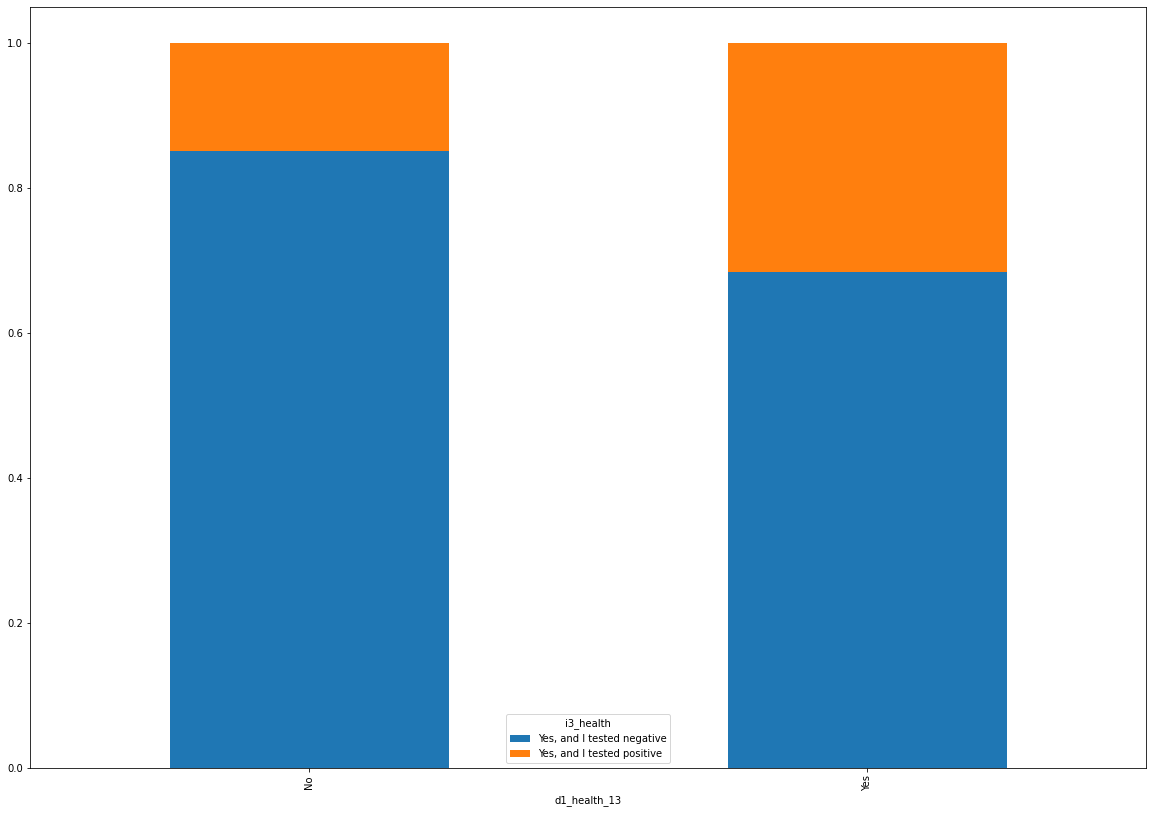

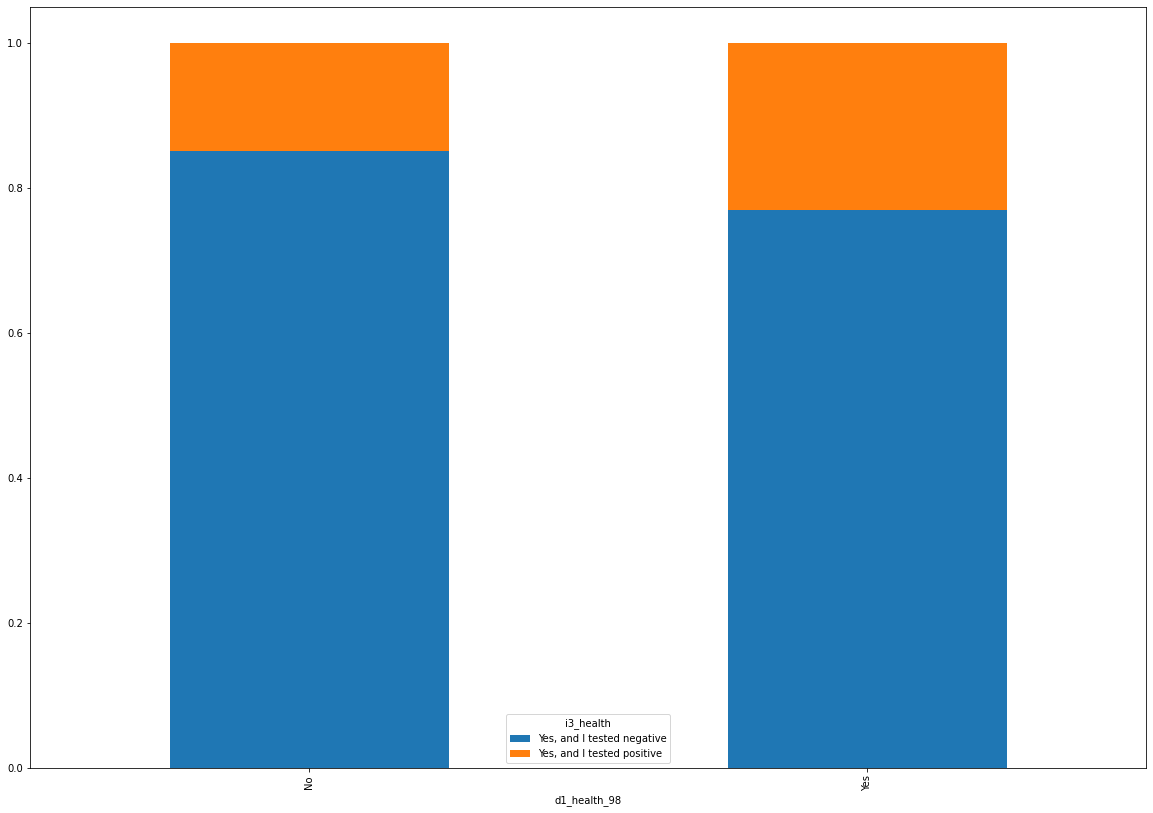

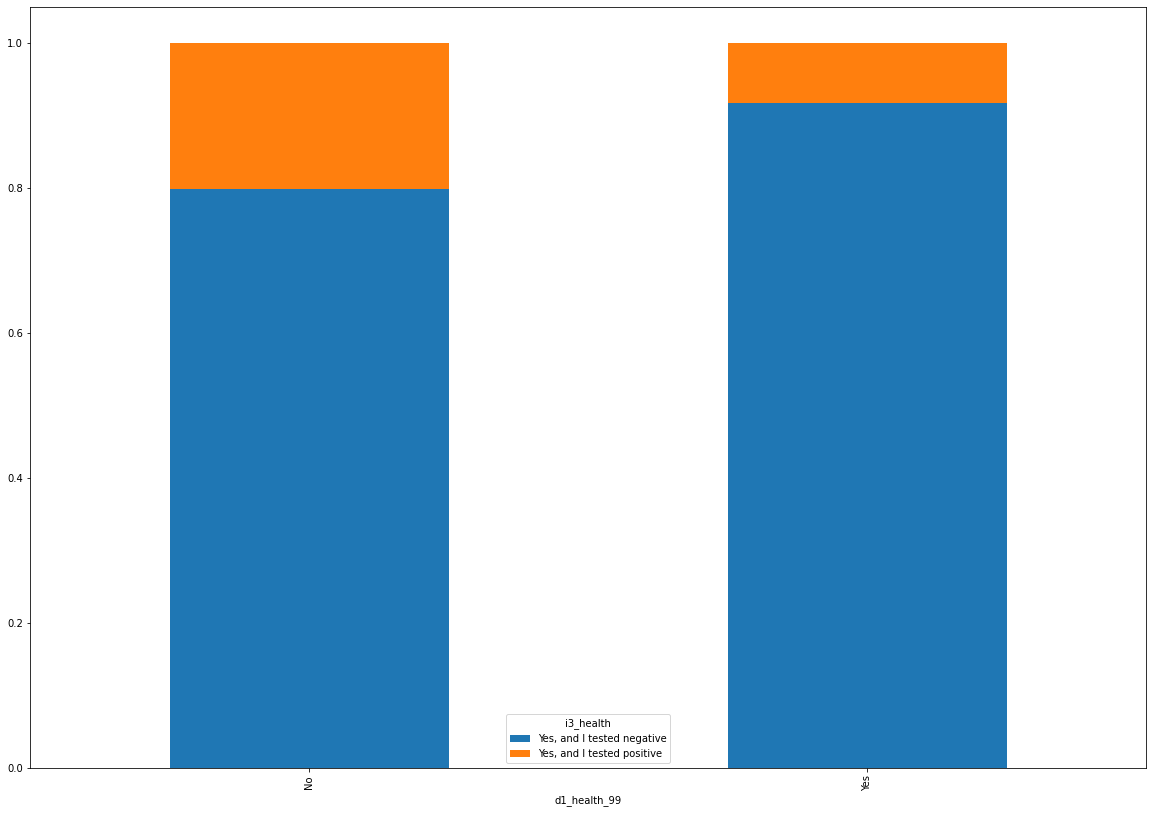

In [36]:
# stacked bar chart for d1-related variables
for var in ["d1_health_1", "d1_health_2", "d1_health_3", "d1_health_4", "d1_health_5", "d1_health_6", "d1_health_7", "\
d1_health_8", "d1_health_9", "d1_health_10", "d1_health_11", "d1_health_12", "d1_health_13", "d1_health_98", "d1_health_99"]:
    crosstab = pd.crosstab(covid["i3_health"], covid[var], margins = False)
    crosstab = crosstab.transpose()
    crosstab_norm = crosstab.div(crosstab.sum(axis = 1), axis = 0)
    crosstab_norm.plot(kind = 'bar', stacked = True,figsize=(20,14))

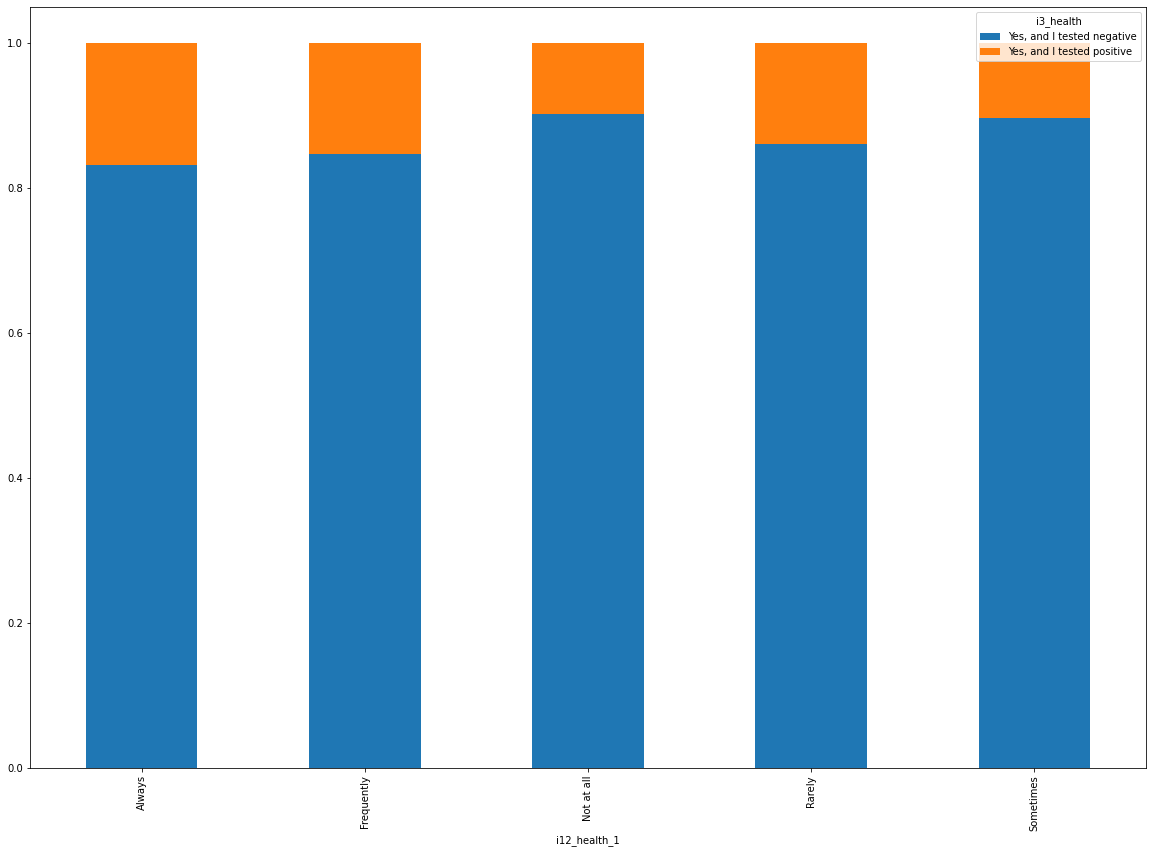

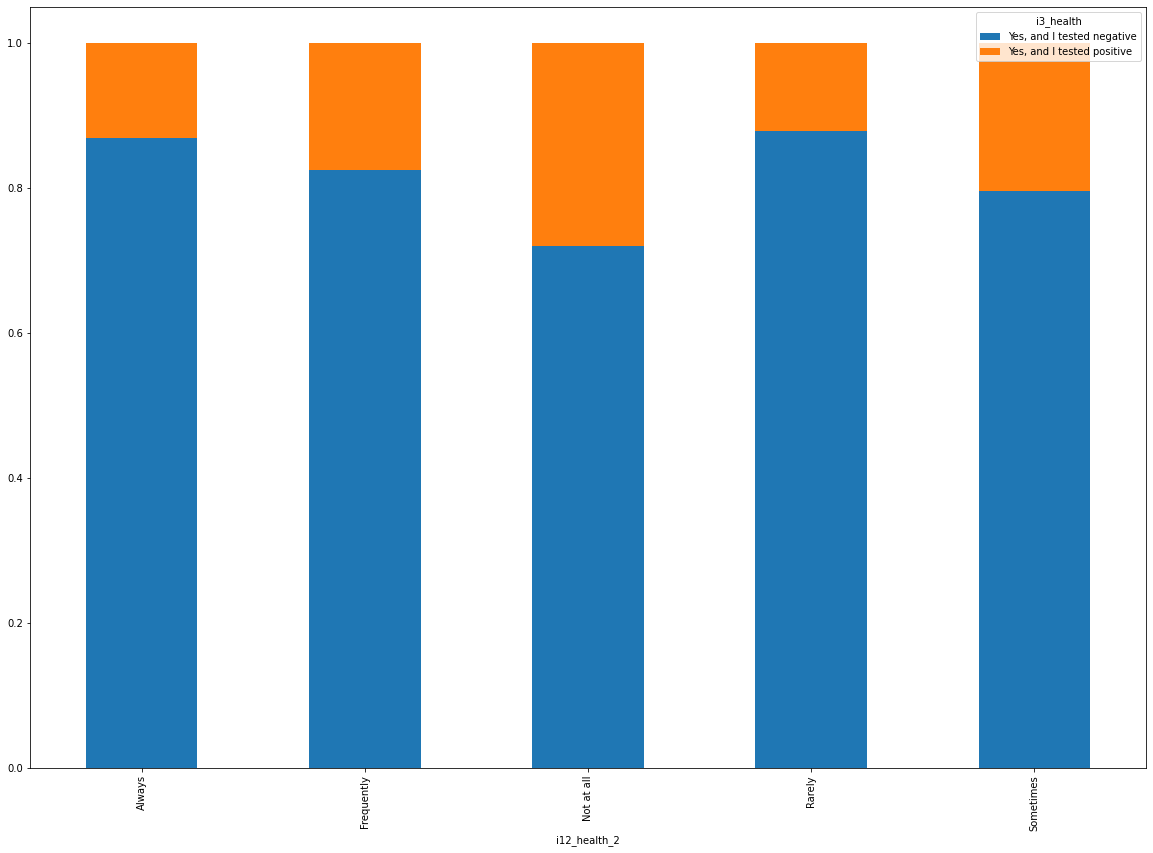

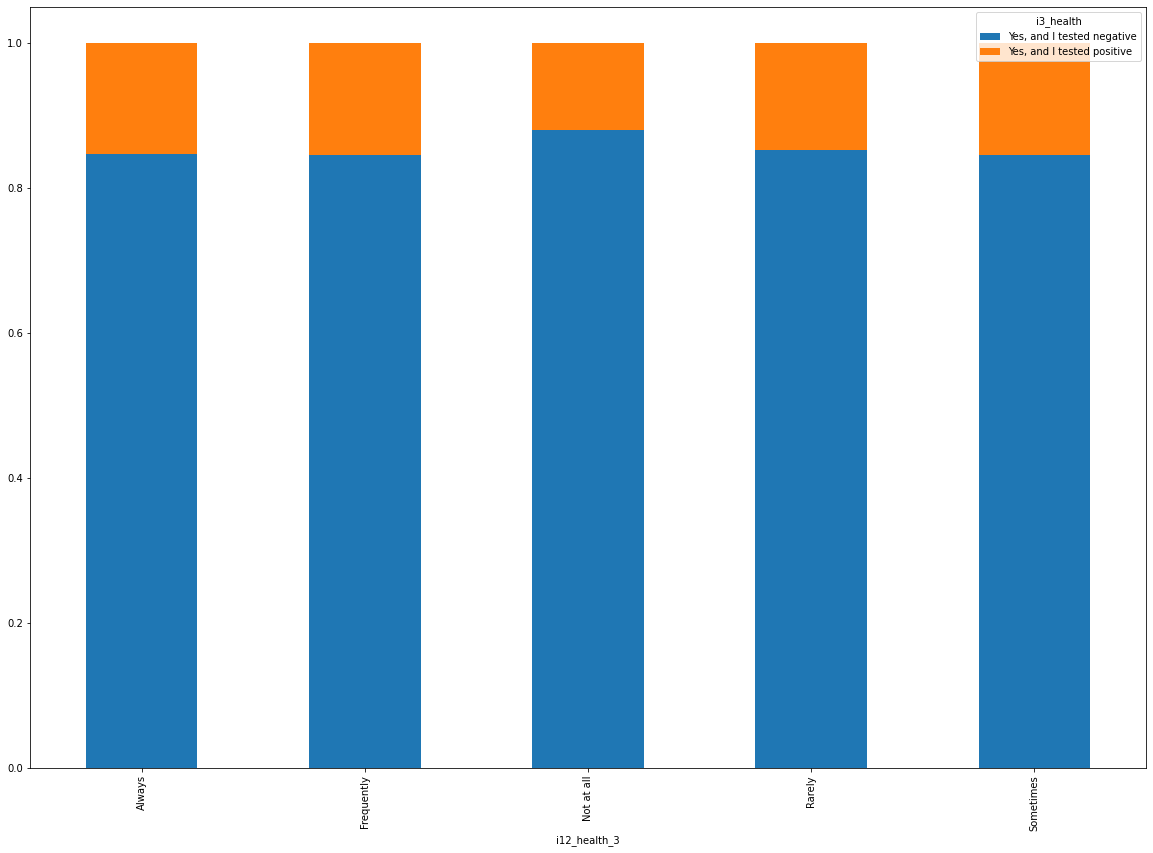

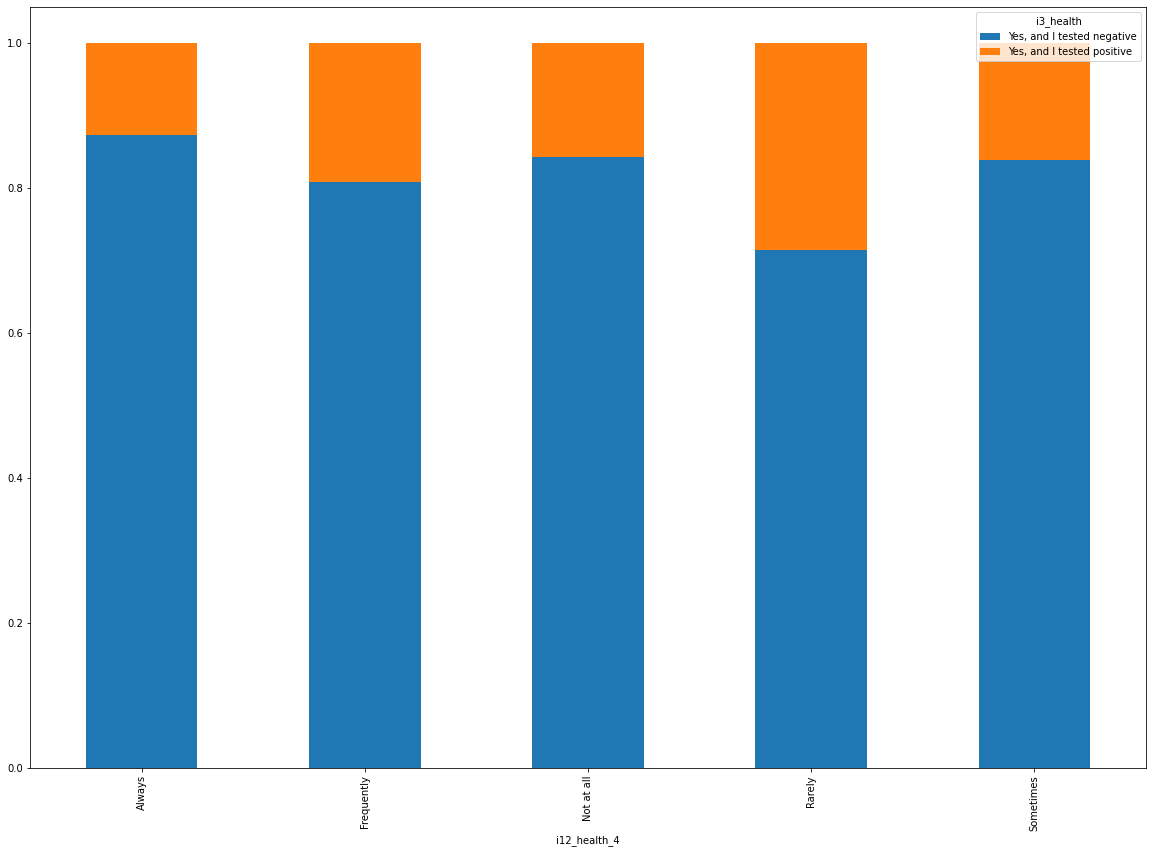

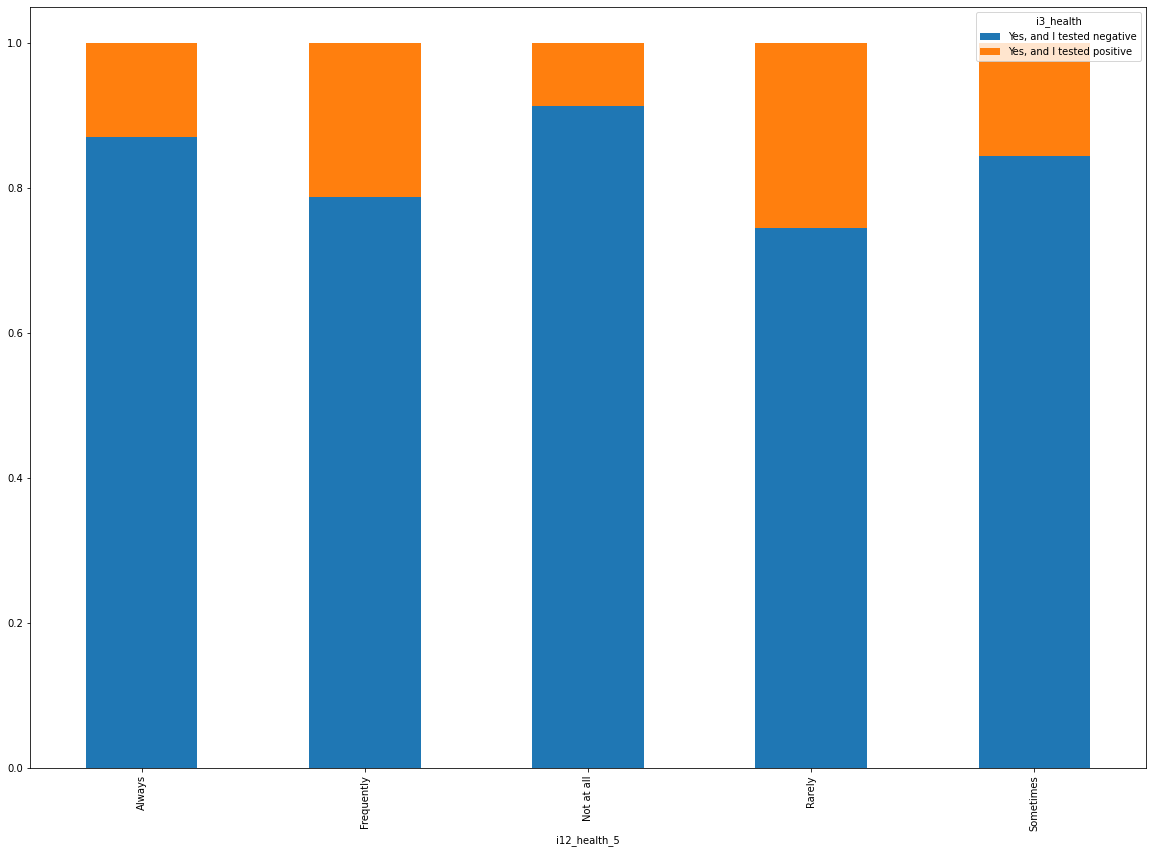

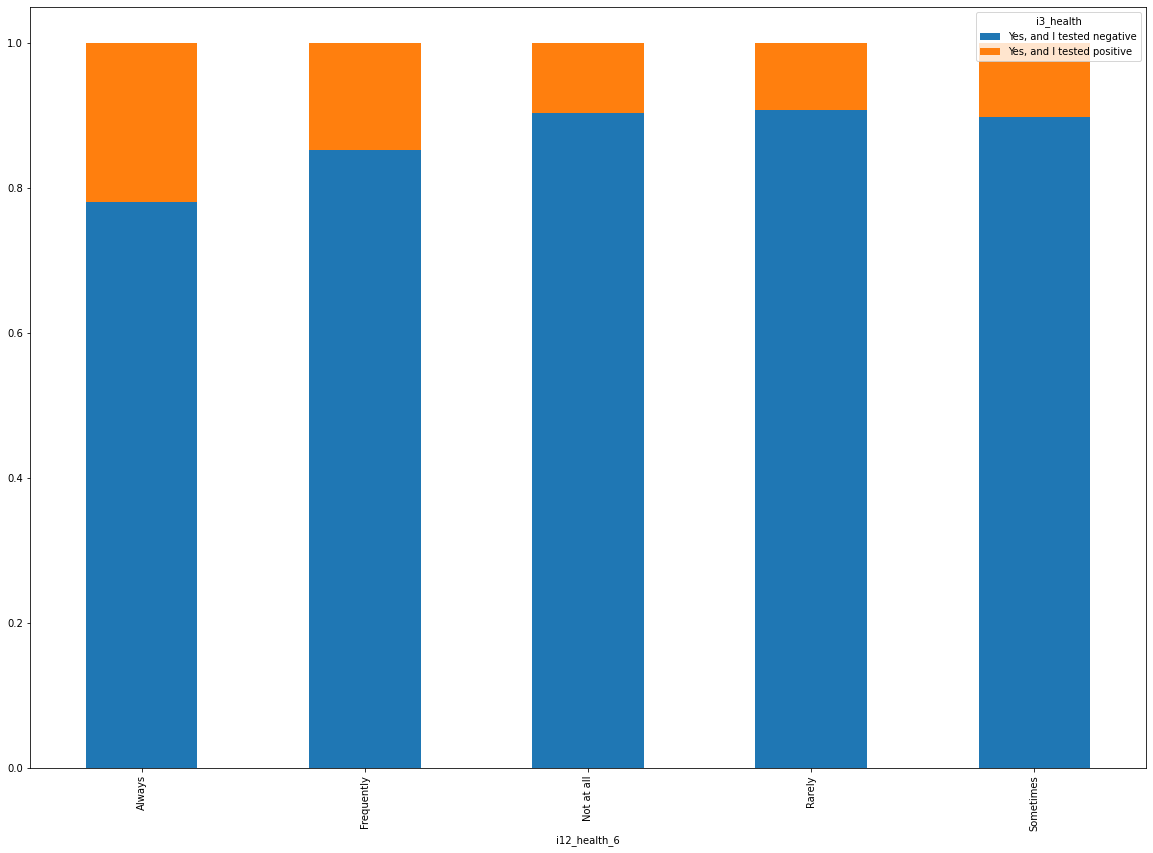

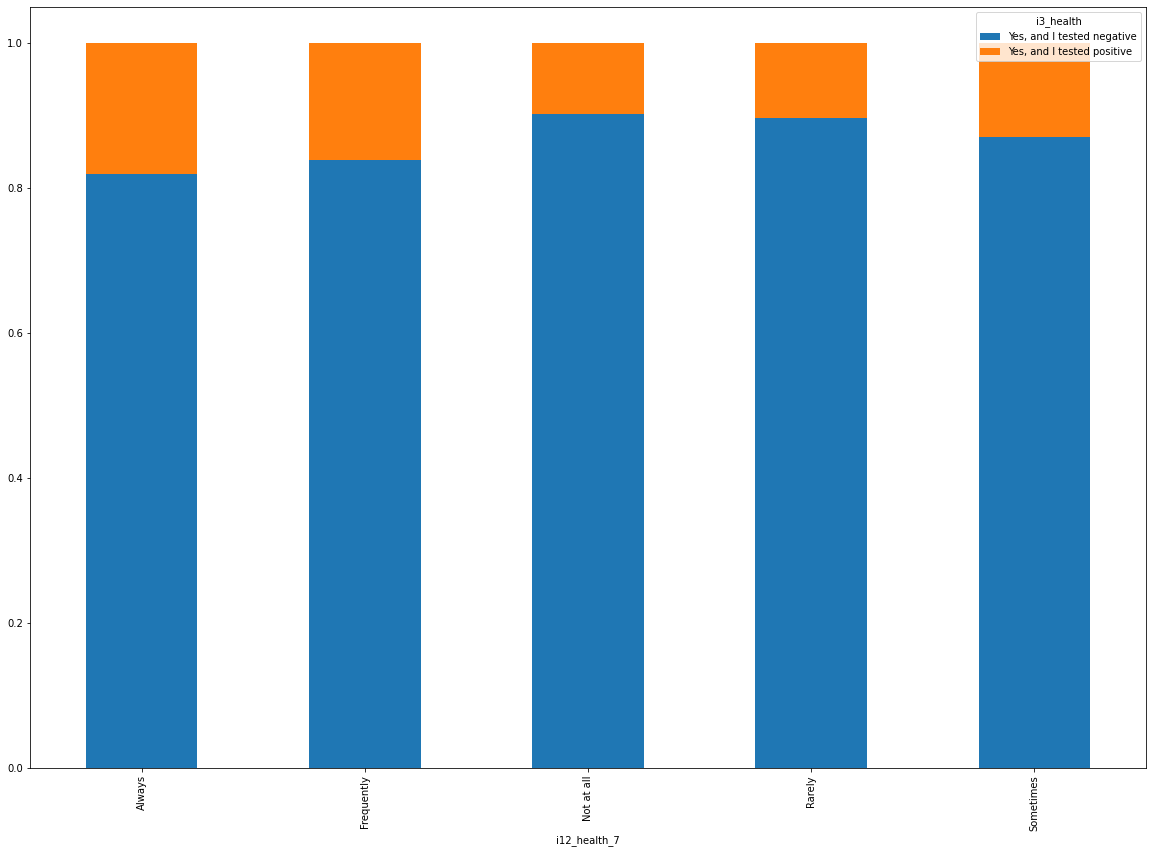

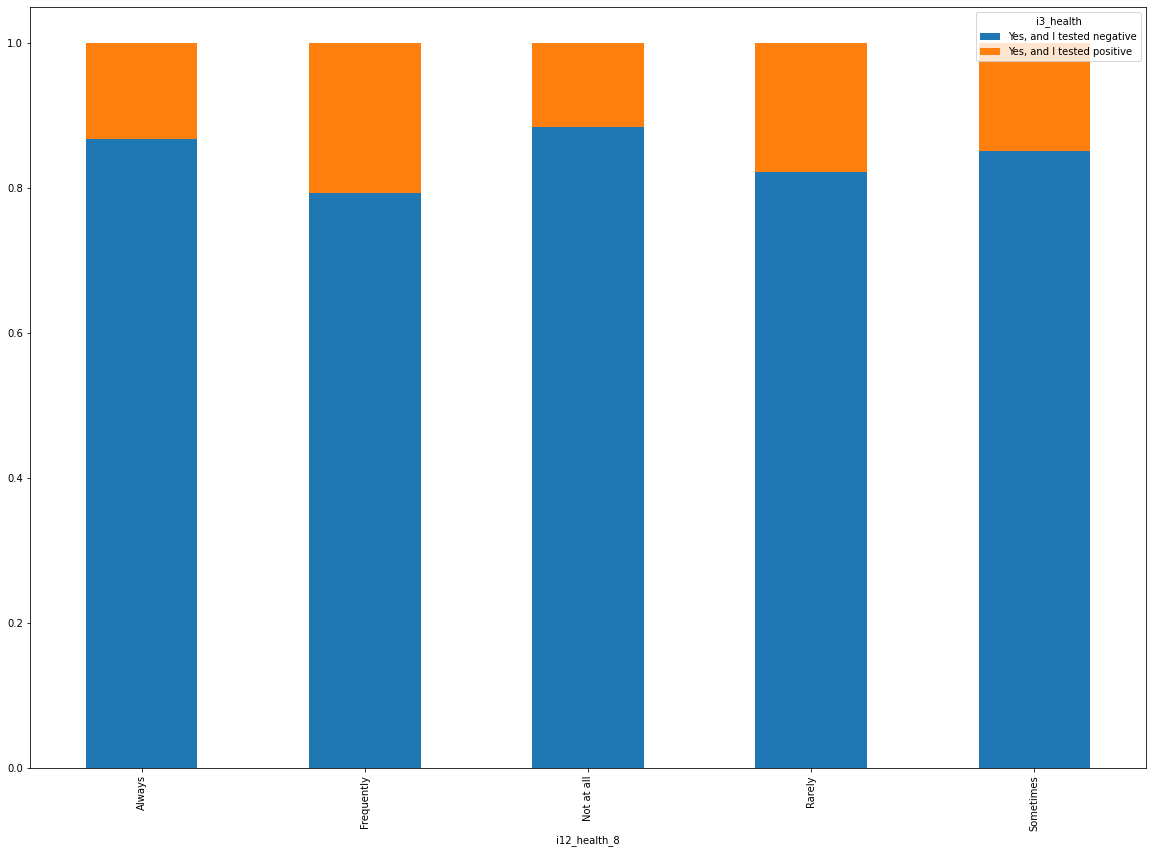

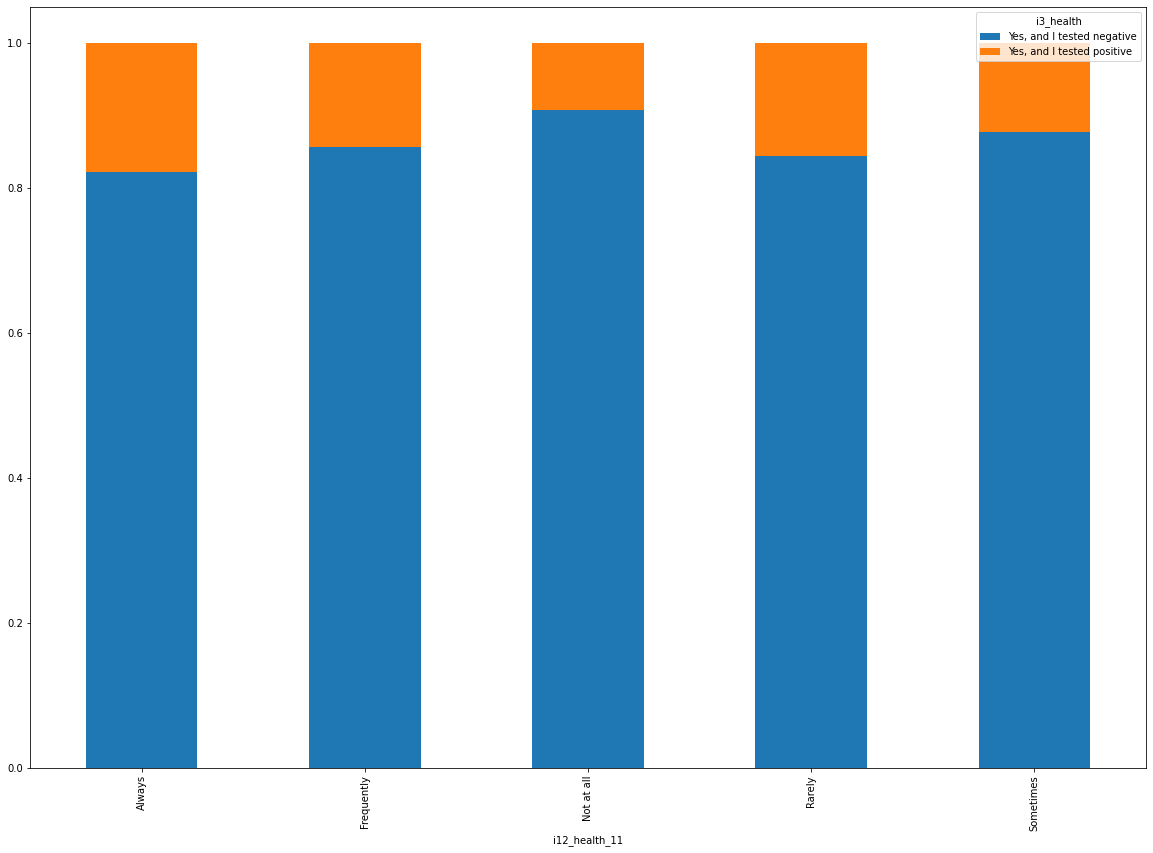

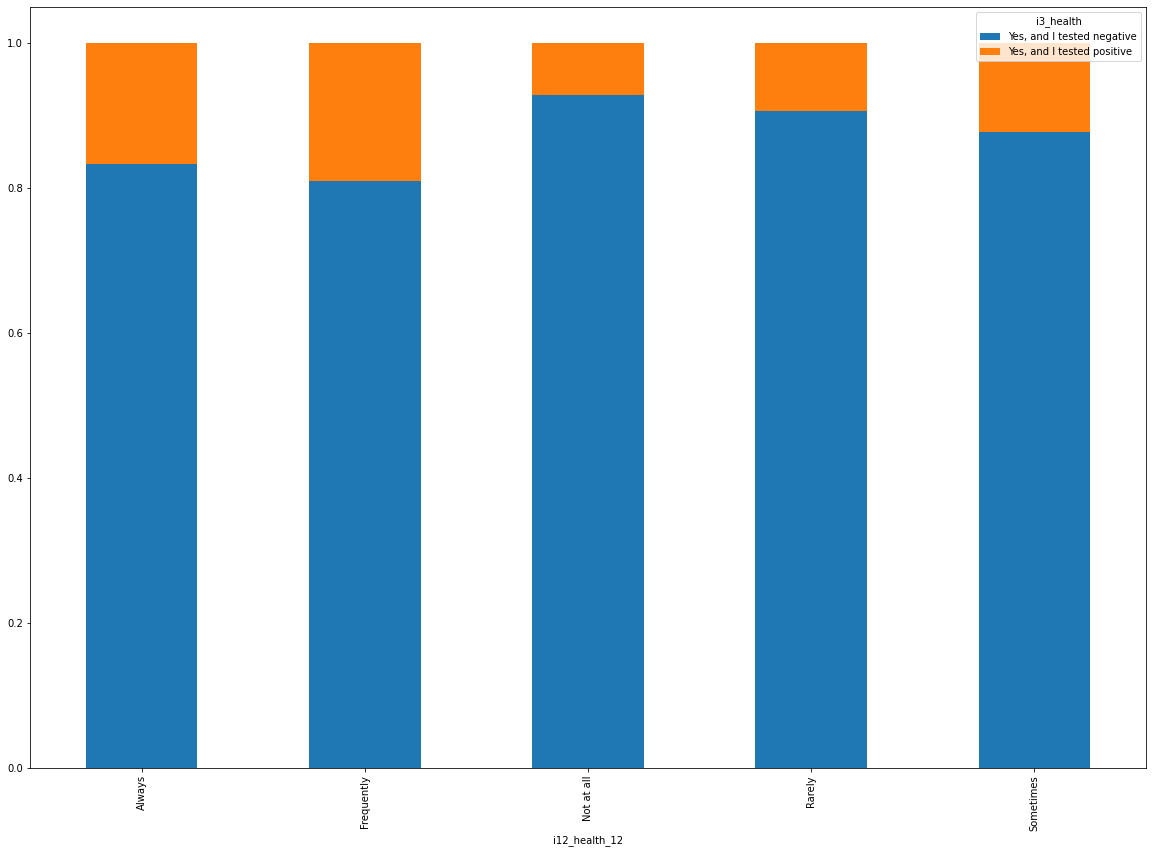

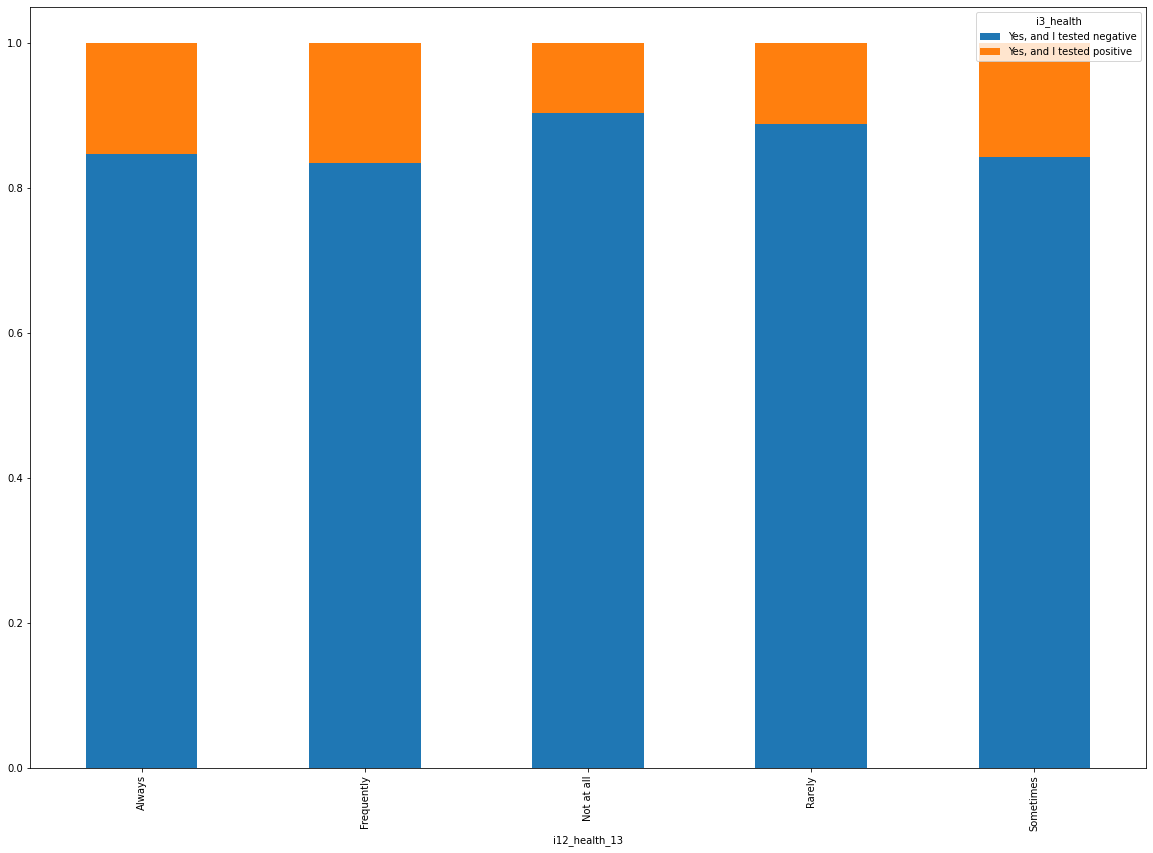

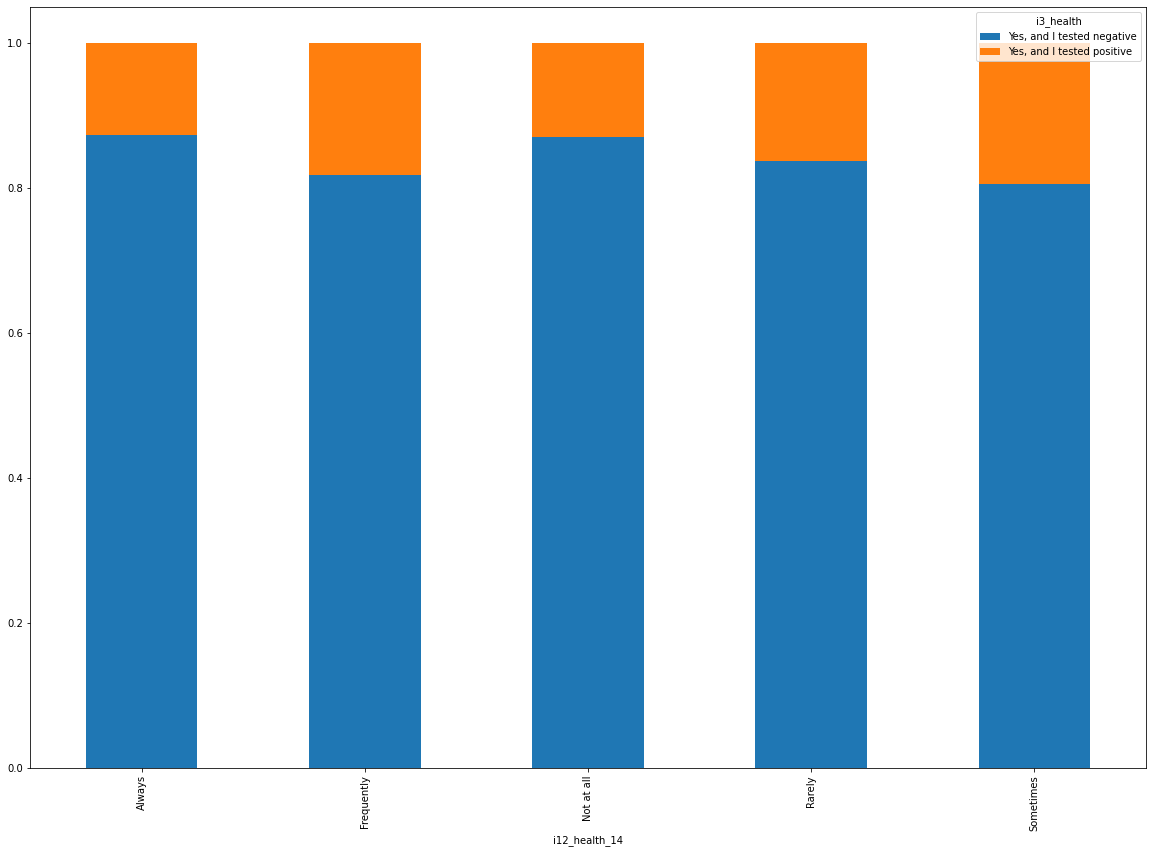

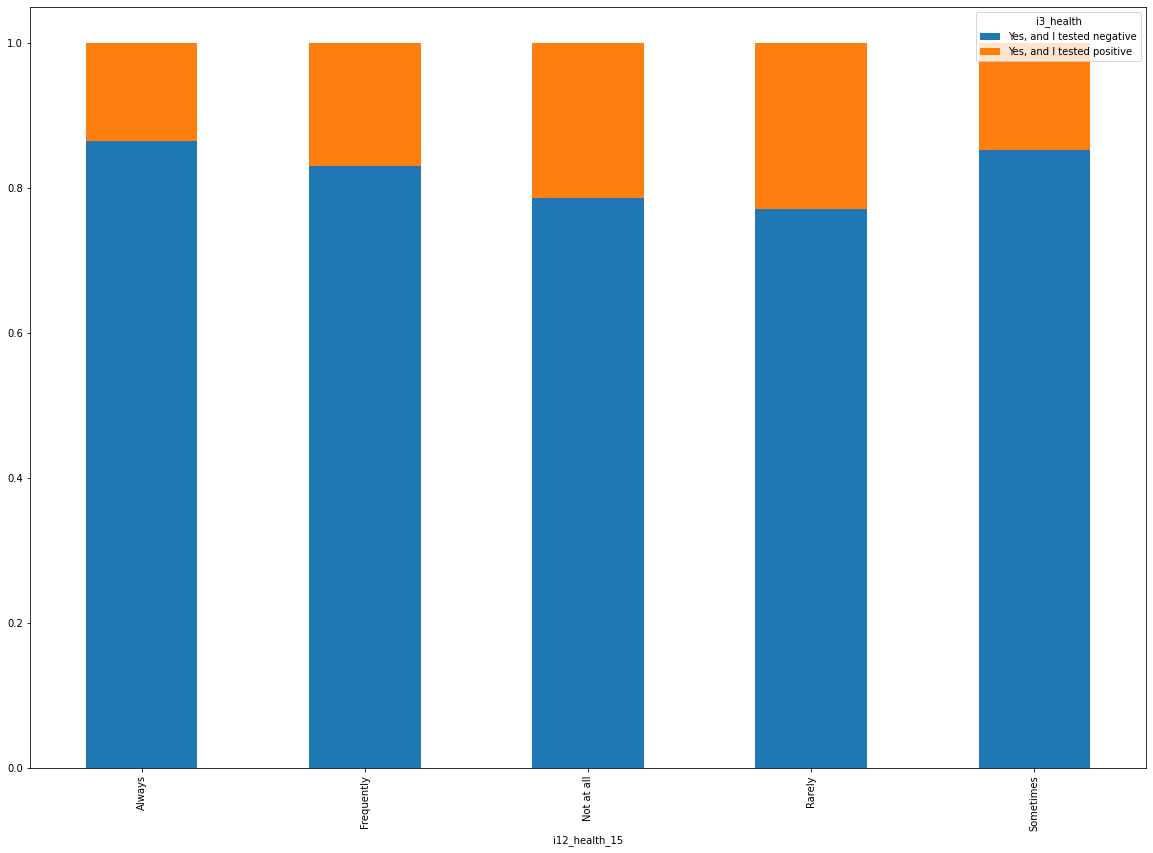

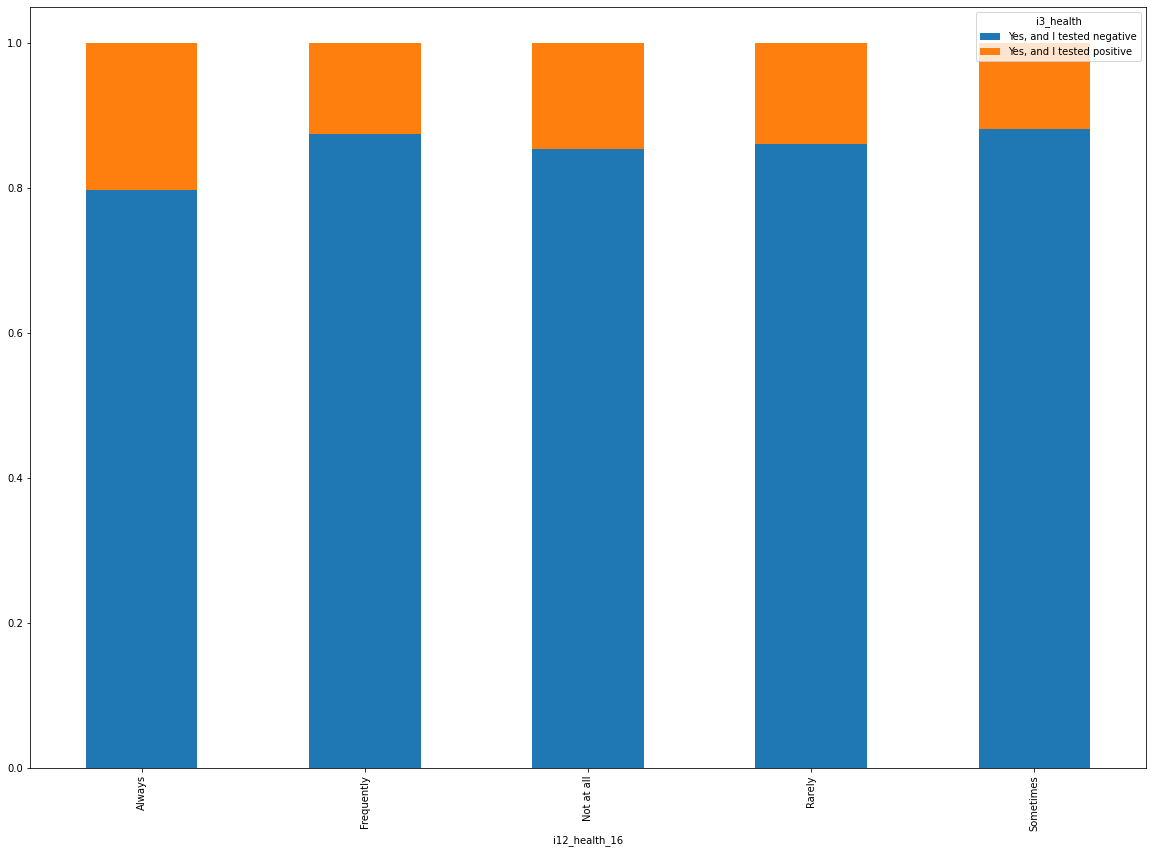

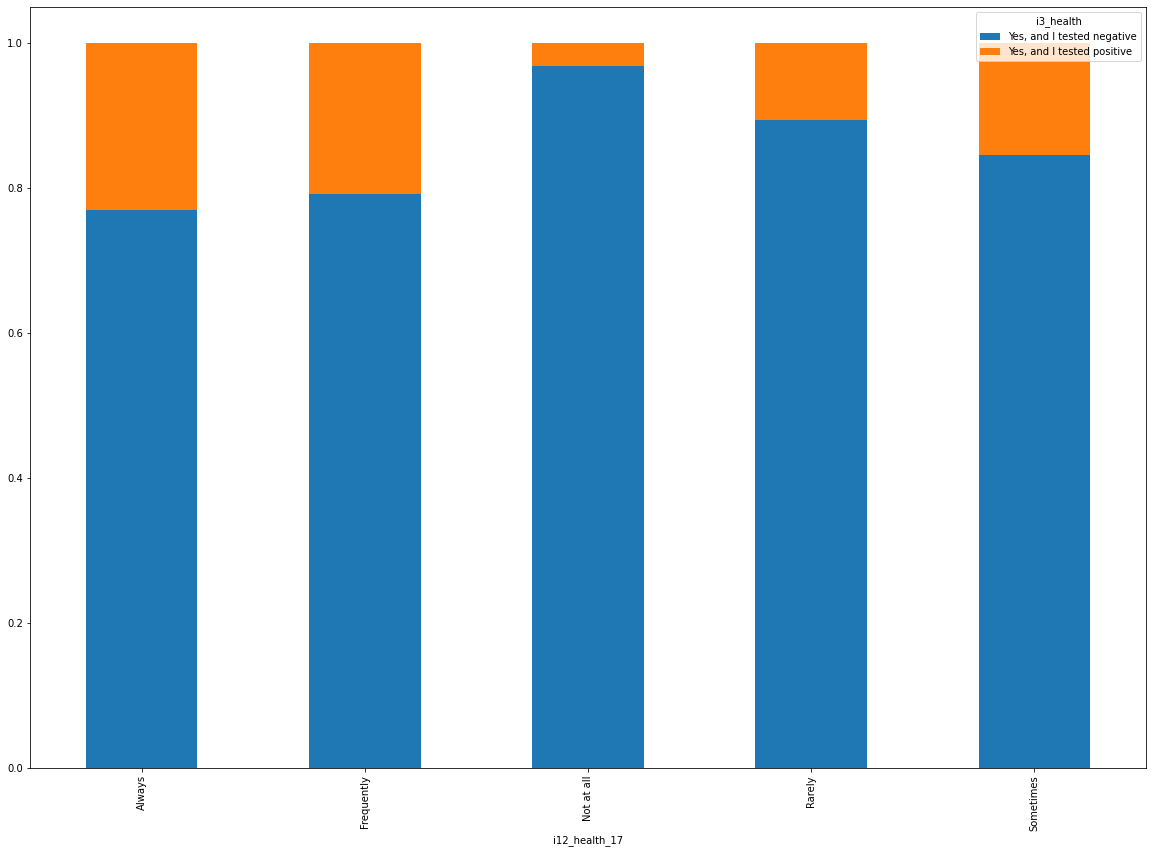

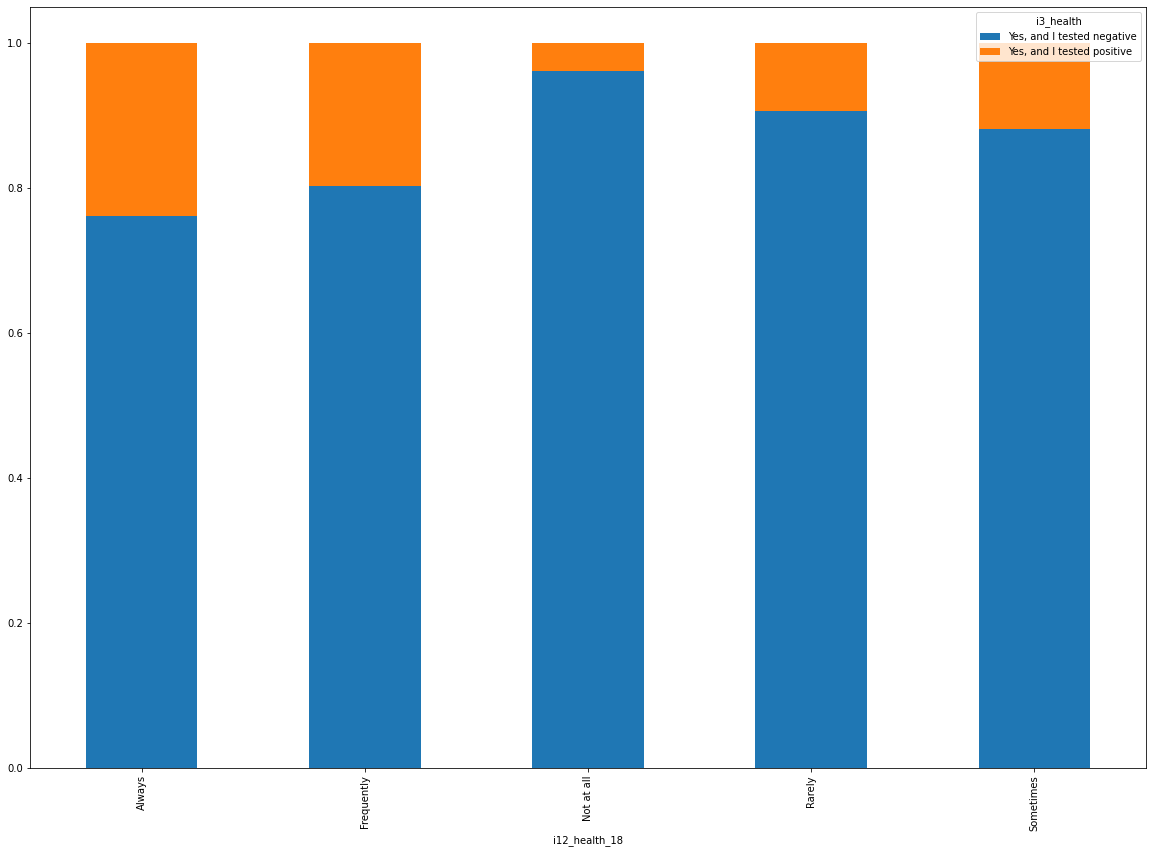

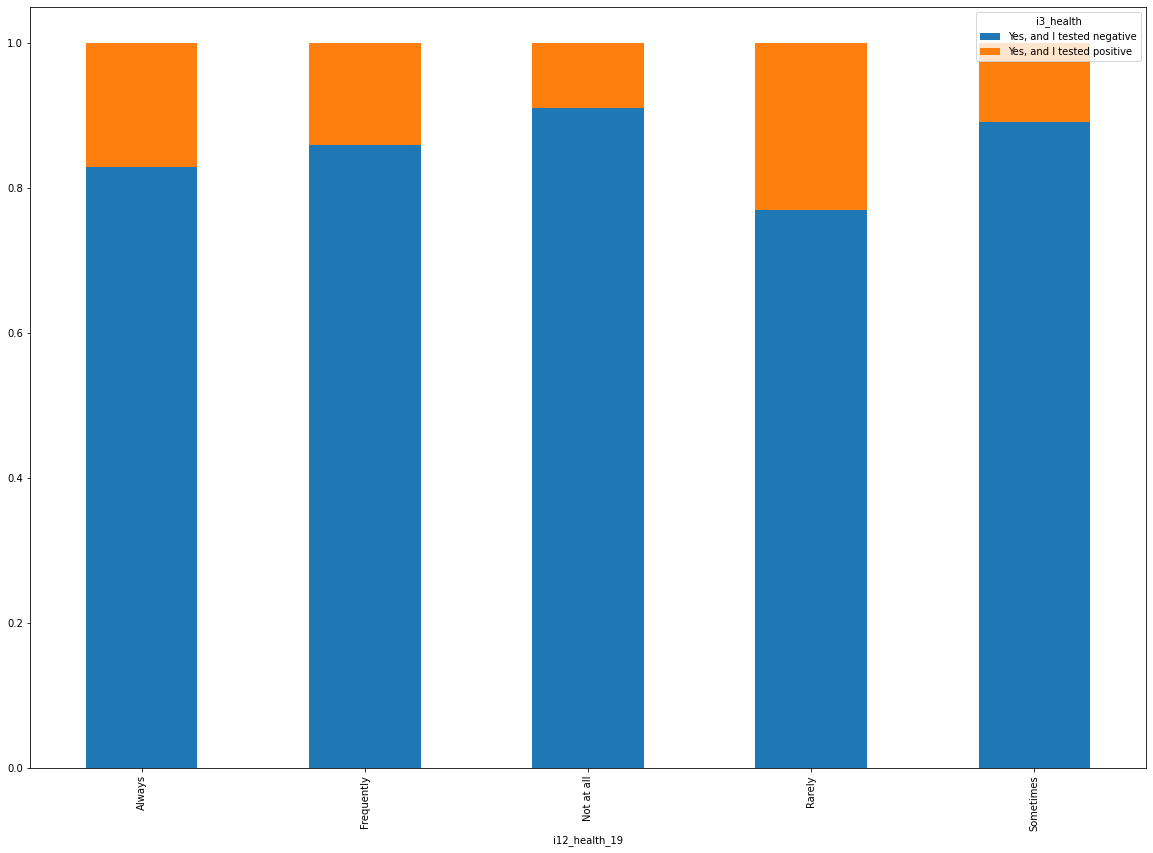

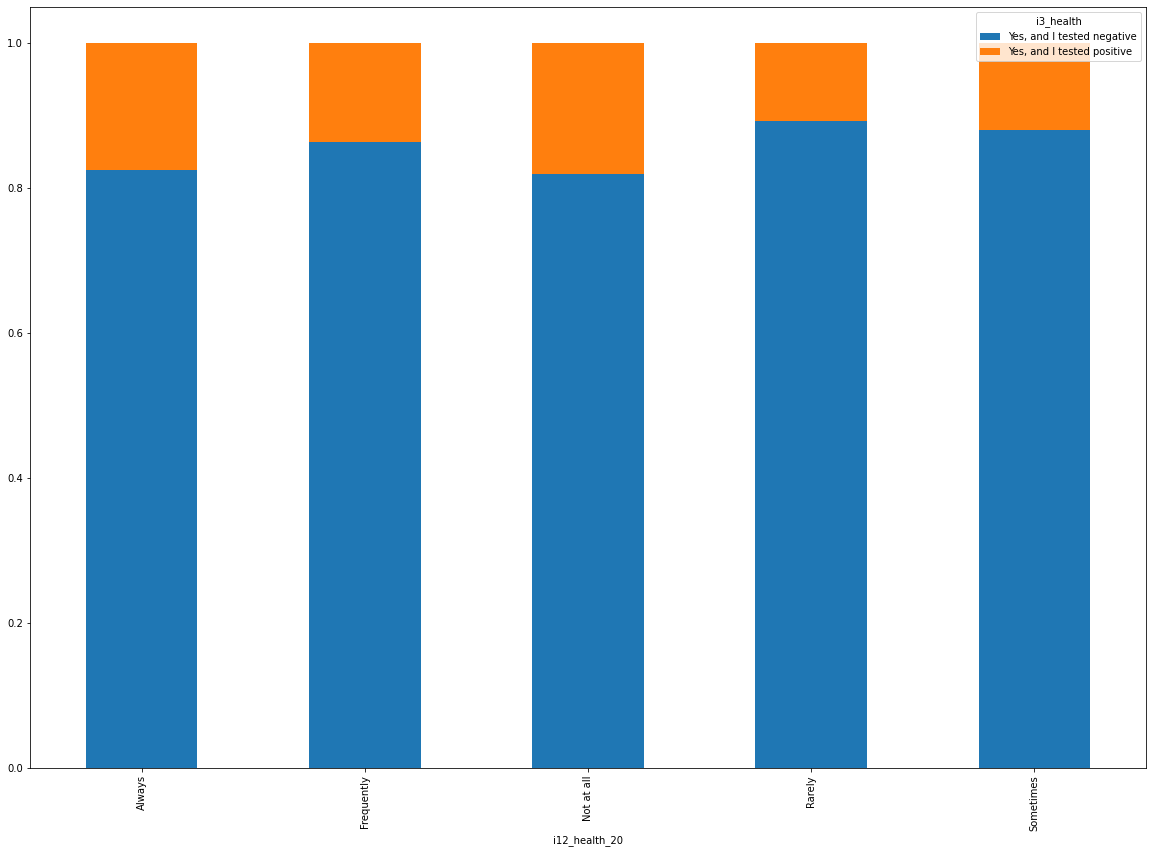

In [37]:
# stacked bar chart for i12-related variables
for var in ['i12_health_1', "i12_health_2", "i12_health_3", "i12_health_4", "i12_health_5", "i12_health_6", "\
i12_health_7", "i12_health_8", "i12_health_11", "i12_health_12", "i12_health_13", "i12_health_14", "i12_health_15", "\
i12_health_16", "i12_health_17", "i12_health_18", "i12_health_19", "i12_health_20"]:
    crosstab = pd.crosstab(covid["i3_health"], covid[var], margins = False)
    crosstab = crosstab.transpose()
    crosstab_norm = crosstab.div(crosstab.sum(axis = 1), axis = 0)
    crosstab_norm.plot(kind = 'bar', stacked = True,figsize=(20,14))


- According to the bar plots, it seems that `i4_health`, `i5_health_1, 2, 3, 4, 5, 99`, `region_state`, `household_size`, `household_children`, `d1_health_2, 3, 4, 5, 7, 11, 13, 99`, and `i12_health_2, 5, 6, 15, 17, 18` may have an impact on the target variable.

### EDA Summary

From the visualizations, we want to put the following variables into the model:

- Numeric: `i13_health`, `age`

- Categorical: `i4_health`, all `i5_health_1, 2, 3, 4, 5, 99`, `region_state`, `household_size`,`household_children`, `d1_health_2, 3, 4, 5, 7, 11, 13, 99`, `i12_health_2, 5, 6, 15, 17, 18`

# SPLITTING DATASET
Since KNN only takes numeric or categorical inputs, we consider modelling with KNN in 2 approaches: 1. fit KNN only to numeric predictors 2. fit KNN only to categorical predictors.

Hence, we split the whole data frame into two



In [38]:
# define a categorical and a numerical subset of the dataset
covid_numerical_features = covid.select_dtypes(include='number')
covid_categorical_features = covid.select_dtypes(include='object')
covid_numerical_features

,i1_health,i2_health,i7a_health,i13_health,weight,age
103,1,1,2,8,1.007474,54
110,2,5,2,8,1.012842,34
127,3,15,3,8,0.992531,36
128,10,10,1,10,0.994496,64
134,2,10,1,10,0.984166,36
...,...,...,...,...,...,...
27787,0,0,5,5,0.944114,44
27794,20,20,3,2,1.211511,29
27805,2,5,2,1,2.068783,30
27842,0,0,0,3,1.249043,22


In [39]:
covid_categorical_features

,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i9_health,i10_health,...,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,gender,region_state,household_size,household_children,employment_status
103,"Yes, and I tested negative","Yes, and they tested negative",No,No,No,No,No,Yes,No,Somewhat easy,...,No,No,No,No,Yes,Male,Quebec / Québec,Don't know,1,Full time employment
110,"Yes, and I tested negative","Yes, and they tested negative",No,No,No,Yes,No,No,Yes,Somewhat easy,...,No,No,No,No,No,Male,Quebec / Québec,1,1,Unemployed
127,"Yes, and I tested negative","Yes, and they tested negative",No,No,No,No,No,Yes,Yes,Somewhat easy,...,No,No,No,No,Yes,Male,Ontario,4,4,Full time employment
128,"Yes, and I tested positive","No, they have not",No,No,No,No,No,Yes,Yes,Very difficult,...,No,Yes,No,No,No,Female,Ontario,2,0,Not working
134,"Yes, and I tested negative","Yes, and they tested negative",No,No,No,No,No,Yes,Yes,Somewhat easy,...,No,No,No,No,Yes,Female,Ontario,3,1,Full time employment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27787,"Yes, and I tested negative","No, they have not",No,No,No,No,No,Yes,No,Neither easy nor difficult,...,No,No,No,No,Yes,Female,Texas,2,0,Full time employment
27794,"Yes, and I tested negative","Yes, and they have not received their results ...",No,No,No,No,Yes,No,Yes,Somewhat easy,...,No,No,No,No,No,Male,California,3,3,Not working
27805,"Yes, and I tested positive","Yes, and they tested negative",No,No,No,No,Yes,No,Not sure,Somewhat easy,...,No,No,No,No,No,Male,Connecticut,1,0,Unemployed
27842,"Yes, and I tested negative",Not sure,No,No,No,No,No,Yes,Not sure,Neither easy nor difficult,...,No,No,No,No,Yes,Male,Mississippi,4,0,Full time employment


### FEATURE SELECTION

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [41]:
X = covid_categorical_features.drop(['i3_health'],axis=1).values
y = covid_categorical_features['i3_health'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)
X = X.astype(str)



*    Title: Chi-Squared Feature Selection source code
*    Author: Brownlee,Jason
*    Date: November 25,2019
*    Code version: 2.0
*    Availability: https://machinelearningmastery.com/feature-selection-with-categorical-data/


In [42]:

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [43]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [44]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

('i3_health', 44.753819722005055)
('i4_health', 39.00207074321458)
('i5_health_1', 45.83323670563983)
('i5_health_2', 56.85196050565753)
('i5_health_3', 40.004229866825284)
('i5_health_4', 43.24916146194772)
('i5_health_5', 42.76227341885049)
('i5_health_99', 14.129856900910637)
('i9_health', 11.533198722034802)
('i10_health', 2.912107718405431)
('i11_health', 9.649951741686412)
('i12_health_1', 5.261490481710745)
('i12_health_2', 0.015038615469203489)
('i12_health_3', 3.0740630587958835)
('i12_health_4', 1.472191930207197)
('i12_health_5', 21.84328350715258)
('i12_health_6', 15.29403452517014)
('i12_health_7', 0.19926606325811236)
('i12_health_8', 1.9521760396572843)
('i12_health_11', 4.762275839088815)
('i12_health_12', 0.0554075686426725)
('i12_health_13', 12.332624826682522)
('i12_health_14', 0.9315102750217251)
('i12_health_15', 5.598094245295813)
('i12_health_16', 17.48985722363584)
('i12_health_17', 28.10473319025437)
('i12_health_18', 1.7135904589698043)
('i12_health_19', 3.015

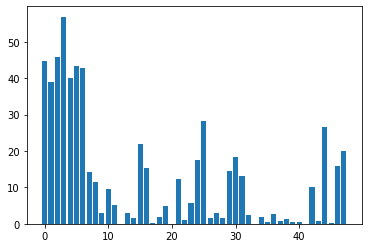

('i3_health', 44.753819722005055)
('i4_health', 39.00207074321458)
('i5_health_1', 45.83323670563983)
('i5_health_2', 56.85196050565753)
('i5_health_3', 40.004229866825284)
('i5_health_4', 43.24916146194772)
('i5_health_5', 42.76227341885049)
('i12_health_17', 28.10473319025437)
('gender', 26.450492021044152)


In [45]:

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print((covid_categorical_features.columns[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
for i in range(len(fs.scores_)):
  if( fs.scores_[i]>25):
    print((covid_categorical_features.columns[i], fs.scores_[i]))

According to scores it seems like the variables with the most influence on the target variables are shown below the graph with a score more than 25.



### Scale the numeric variables

One requirement for KNN to work properly is to have every inputs in the same scale. So, here, we scaled all the numeric variables.

In [46]:
# scale the numeric variables
scaler = StandardScaler().fit(covid_numerical_features)
rescaled_covid_numeric = scaler.transform(covid_numerical_features)
rescaled_covid_numeric

array([[-0.54813006, -0.43770706,  0.00555655,  0.19877352, -0.11197159,
         1.00234088],
       [-0.17540162,  0.13656816,  0.00555655,  0.19877352, -0.10385052,
        -0.30642559],
       [ 0.19732682,  1.5722562 ,  0.4278543 ,  0.19877352, -0.13457754,
        -0.17554894],
       ...,
       [-0.17540162,  0.13656816,  0.00555655, -1.26040481,  1.49360653,
        -0.56817888],
       [-0.92085849, -0.58127586, -0.83903895, -0.84349672,  0.2534813 ,
        -1.09168547],
       [-0.17540162, -0.29413825, -0.83903895, -0.42658862, -0.28769251,
        -0.82993217]])

### Scale the categorical variables

We used one-hot-encoding for the categorical variables so they are comparable using the same distance metric.

In [47]:
# Convert the categorical variables using OneHotEncoding algorithm to use them in KNN
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(covid_categorical_features)
onehot_df=pd.DataFrame(onehot)

In [48]:
onehot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Columns: 232 entries, 0 to 231
dtypes: float64(232)
memory usage: 2.3 MB


## Model

### Prepare the dataset needed for modeling

In [49]:
# define a final categorical dataset that includes the most important predictors and the target variable
covid_categorical_final=covid_categorical_features[['i4_health','i5_health_1','i5_health_2','i5_health_3','i5_health_4','i5_health_5','i12_health_5','d1_health_3','gender','i3_health']]
covid_categorical_final

,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i12_health_5,d1_health_3,gender,i3_health
103,"Yes, and they tested negative",No,No,No,No,No,Frequently,No,Male,"Yes, and I tested negative"
110,"Yes, and they tested negative",No,No,No,Yes,No,Rarely,No,Male,"Yes, and I tested negative"
127,"Yes, and they tested negative",No,No,No,No,No,Always,No,Male,"Yes, and I tested negative"
128,"No, they have not",No,No,No,No,No,Always,No,Female,"Yes, and I tested positive"
134,"Yes, and they tested negative",No,No,No,No,No,Frequently,No,Female,"Yes, and I tested negative"
...,...,...,...,...,...,...,...,...,...,...
27787,"No, they have not",No,No,No,No,No,Always,No,Female,"Yes, and I tested negative"
27794,"Yes, and they have not received their results ...",No,No,No,No,Yes,Sometimes,No,Male,"Yes, and I tested negative"
27805,"Yes, and they tested negative",No,No,No,No,Yes,Frequently,No,Male,"Yes, and I tested positive"
27842,Not sure,No,No,No,No,No,Sometimes,No,Male,"Yes, and I tested negative"


In [50]:
# define our X and y variables
y=covid_categorical_final['i3_health']
X=covid_categorical_final.drop('i3_health',axis=1)
y
X

,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i12_health_5,d1_health_3,gender
103,"Yes, and they tested negative",No,No,No,No,No,Frequently,No,Male
110,"Yes, and they tested negative",No,No,No,Yes,No,Rarely,No,Male
127,"Yes, and they tested negative",No,No,No,No,No,Always,No,Male
128,"No, they have not",No,No,No,No,No,Always,No,Female
134,"Yes, and they tested negative",No,No,No,No,No,Frequently,No,Female
...,...,...,...,...,...,...,...,...,...
27787,"No, they have not",No,No,No,No,No,Always,No,Female
27794,"Yes, and they have not received their results ...",No,No,No,No,Yes,Sometimes,No,Male
27805,"Yes, and they tested negative",No,No,No,No,Yes,Frequently,No,Male
27842,Not sure,No,No,No,No,No,Sometimes,No,Male


In [51]:
#converting categorical predictors to numeric using one hot encoding
encoder = OneHotEncoder(sparse=False)
onehot_predictors = encoder.fit_transform(X)
onehot_df_predictors=pd.DataFrame(onehot_predictors)
onehot_df_predictors

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1288,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1289,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1290,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [52]:
# converting categorical target to numeric using one-hot-encoding, since KNN requires numeric input
y=y.values.reshape(-1,1)
onehot_target=encoder.fit_transform(y)
onehot_df_target=pd.DataFrame(onehot_target)
onehot_df_target

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
1287,1.0,0.0
1288,1.0,0.0
1289,0.0,1.0
1290,1.0,0.0


### Approach with simple training/testing set split (no cross-validation)


*    Title: ML | Implementation of KNN classifier using Sklearn source code
*    Author: Gupta, Alind
*    Date: 28 Nov,2019
*    Code version: 2.0
*    Availability: https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/


In [53]:
# split the data into training/testing set
X_train, X_test, y_train, y_test = train_test_split(
             onehot_predictors, onehot_target, test_size = 0.3, random_state = 0)

In [54]:
from tqdm import tqdm
# training model
K = []
training = []
test = []
scores = {}

# fit the model to the training dataset with values of k ranging from 2 to 20
# calculate the training score
for k in tqdm(range(2, 21)):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

100%|██████████| 19/19 [00:02<00:00,  6.84it/s]


In [55]:
# print out the training and testing score associated with each value of k
# k:[training score, testing score]
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8351769911504425, 0.7938144329896907]
3 : [0.9070796460176991, 0.8994845360824743]
4 : [0.8573008849557522, 0.8505154639175257]
5 : [0.9026548672566371, 0.8994845360824743]
6 : [0.8783185840707964, 0.8788659793814433]
7 : [0.8982300884955752, 0.8994845360824743]
8 : [0.8816371681415929, 0.8865979381443299]
9 : [0.8938053097345132, 0.8943298969072165]
10 : [0.8816371681415929, 0.8865979381443299]
11 : [0.8938053097345132, 0.8943298969072165]
12 : [0.8882743362831859, 0.8891752577319587]
13 : [0.8938053097345132, 0.8917525773195877]
14 : [0.8871681415929203, 0.884020618556701]
15 : [0.8893805309734514, 0.8865979381443299]
16 : [0.8772123893805309, 0.884020618556701]
17 : [0.8827433628318584, 0.8917525773195877]
18 : [0.8783185840707964, 0.8865979381443299]
19 : [0.8816371681415929, 0.8943298969072165]
20 : [0.875, 0.884020618556701]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


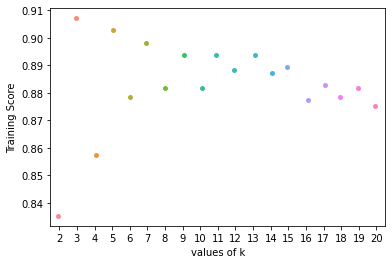

In [56]:
# plot the training score
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


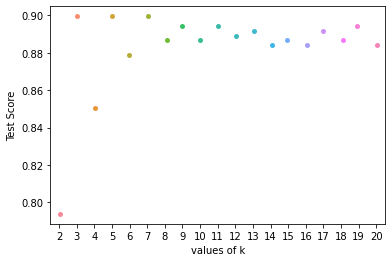

In [57]:
# plot the test score
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

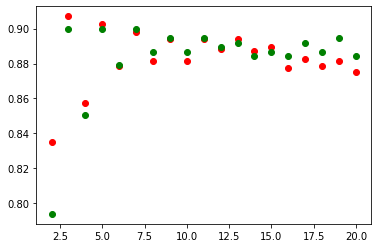

In [58]:
# comparison between training set in red and test set in green
plt.scatter(K, training, color ='r')
plt.scatter(K, test, color ='g')
plt.show()

In [59]:
#fit the knn for n=7 and the accuracy score
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(onehot_predictors,onehot_target)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9252577319587629


### Cross Validation approach for KNN

In [60]:
array = covid_categorical_final.values

In [61]:
# define the X variables
X_C=covid_categorical_final.iloc[:,:-1]
X_C

,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i12_health_5,d1_health_3,gender
103,"Yes, and they tested negative",No,No,No,No,No,Frequently,No,Male
110,"Yes, and they tested negative",No,No,No,Yes,No,Rarely,No,Male
127,"Yes, and they tested negative",No,No,No,No,No,Always,No,Male
128,"No, they have not",No,No,No,No,No,Always,No,Female
134,"Yes, and they tested negative",No,No,No,No,No,Frequently,No,Female
...,...,...,...,...,...,...,...,...,...
27787,"No, they have not",No,No,No,No,No,Always,No,Female
27794,"Yes, and they have not received their results ...",No,No,No,No,Yes,Sometimes,No,Male
27805,"Yes, and they tested negative",No,No,No,No,Yes,Frequently,No,Male
27842,Not sure,No,No,No,No,No,Sometimes,No,Male


In [62]:
# define our target y
y_C=covid_categorical_final.iloc[:,-1]
y_C

103      Yes, and I tested negative
110      Yes, and I tested negative
127      Yes, and I tested negative
128      Yes, and I tested positive
134      Yes, and I tested negative
                    ...            
27787    Yes, and I tested negative
27794    Yes, and I tested negative
27805    Yes, and I tested positive
27842    Yes, and I tested negative
27847    Yes, and I tested negative
Name: i3_health, Length: 1292, dtype: object

In [63]:
# converting categorical predictors to numeric using one hot encoding
encoder = OneHotEncoder(sparse=False)
onehot_predictors_C = encoder.fit_transform(X_C)
onehot_df_predictors_C=pd.DataFrame(onehot_predictors_C)
onehot_df_predictors_C

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1288,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1289,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1290,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [64]:
# converting categorical target to numeric
y_C= y_C.values.reshape(-1,1)
onehot_target_C=encoder.fit_transform(y_C)
onehot_df_target_C=pd.DataFrame(onehot_target_C)
onehot_df_target_C

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
1287,1.0,0.0
1288,1.0,0.0
1289,0.0,1.0
1290,1.0,0.0


In [65]:
test_size=0.20
seed=42

In [66]:
# split the dataset into training/testing
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(onehot_predictors_C, onehot_df_target_C, test_size = test_size, random_state = seed)

In [67]:
print(X_C_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]


In [68]:
print(y_C_train)

        0    1
1067  1.0  0.0
966   1.0  0.0
803   1.0  0.0
339   1.0  0.0
667   0.0  1.0
...   ...  ...
1044  1.0  0.0
1095  0.0  1.0
1130  1.0  0.0
860   1.0  0.0
1126  1.0  0.0

[1033 rows x 2 columns]


In [69]:
# define the number of folds for the cross-validation
num_folds = 10

In [70]:
# define the scoring method
scoring = 'neg_mean_squared_error'

In [71]:
model = KNeighborsClassifier()

In [73]:
k_values = np.arange(1, 22)
param_grid = dict(n_neighbors=k_values)

In [74]:
# define the k-fold cross-validator, which splits the dataset into k consecutive folds
kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)

In [75]:
# search for the optimal k value in the parameter space defined by param_grid
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring = scoring, cv = kfold)

In [76]:
grid_result = grid.fit(onehot_predictors_C, onehot_df_target_C)

In [77]:
# print out the best score we have along with its corresponding k value
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.104496 using {'n_neighbors': 9}


In [ ]:
means = grid_result.cv_results_['mean_test_score']

In [ ]:
stds = grid_result.cv_results_['std_test_score']

In [ ]:
params = grid_result.cv_results_['params']

Text(0, 0.5, 'Negative Mean Squared Error')

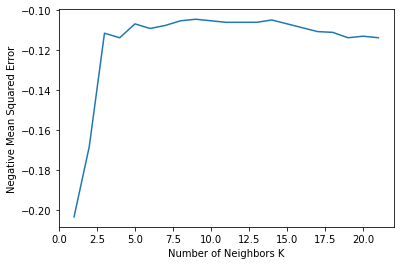

In [ ]:
# plot the negative MSE for different values of k
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Squared Error")

In [ ]:
# build the final model with the optimal k
model = KNeighborsClassifier(n_neighbors=9)

In [ ]:
# fit the final model
model.fit(onehot_predictors_C, onehot_df_target_C)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# generate predictions
estimates = model.predict(X_C_test)

In [ ]:
# calculate the MSE
mean_squared_error(y_C_test, estimates)

0.07722007722007722

In [ ]:
# calculate the accuracy score
print(metrics.accuracy_score(y_C_test, estimates))

0.9227799227799228


In [ ]:
# confusion matrix
print(confusion_matrix(y_C_test.values.argmax(axis=1), estimates.argmax(axis=1)))
print(metrics.classification_report(y_C_test.values.argmax(axis=1), estimates.argmax(axis=1))) 

[[216   1]
 [ 19  23]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       217
           1       0.96      0.55      0.70        42

    accuracy                           0.92       259
   macro avg       0.94      0.77      0.83       259
weighted avg       0.93      0.92      0.91       259



### Summary statistics for our target groups

In [ ]:
# join the predictions back to the original dataset
all_pred = pd.DataFrame(model.predict(onehot_df_predictors_C))
all_pred.set_axis(['negative', 'positive'], axis=1, inplace=True)
all_pred['class'] = np.where(all_pred['negative'] == 1, 0, 1)
all_pred_class = all_pred[['class']].copy()

In [ ]:
onehot_df_predictors_C

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1288,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1289,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1290,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
all_pred_class

,class
0,0
1,0
2,0
3,0
4,0
...,...
1287,0
1288,0
1289,0
1290,0


In [ ]:
# join the predictions back to the predictors table
result_target = pd.concat([onehot_df_predictors_C, all_pred_class], axis="columns")
result_target

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,class
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1288,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
1289,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1290,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0


In [ ]:
# Find the mean value of each predictor variable for the two target groups
predictor_names = onehot_df_predictors_C.columns
summary_table = result_target.groupby('class', as_index=False).agg({0: "mean"})
for predictor in range(1, len(predictor_names)):
  temp_tab = result_target.groupby('class', as_index=False).agg({predictor: "mean"})
  temp_summary = temp_tab[[predictor]].copy()

  summary_table = pd.concat([summary_table, temp_summary], axis="columns")

summary_table


,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.273497,0.041490,0.063506,0.585944,0.035563,0.895004,0.104996,0.934801,0.065199,...,0.088908,0.604572,0.188823,0.044877,0.032176,0.129551,0.925487,0.074513,0.357324,0.642676
1,1,0.000000,0.009009,0.018018,0.072072,0.900901,0.585586,0.414414,0.576577,0.423423,...,0.450450,0.513514,0.288288,0.045045,0.081081,0.072072,0.738739,0.261261,0.297297,0.702703
